# Generate Gene List for FunGen xQTL Analysis

## Overview
This analysis is trying to understand the functional pathway signals for the gene list we found from xQTL data. We are trying to answer the question -- we have limit genes overlapped with GVC and TWAS, does that true or we did incorrect analysis. For this, we need to answer it through: 
1. functional pathways enrichment (using 0.1 as threshold for adjusted p_value)
    1. for genes in all genes -- to check the overview pathways we have: not significant (adjusted p_value > 0.3)
    2. for genes in each image trait -- to check image-trait specific pathways: not significant but biological meaningful, worth digging;
    3. for genes in image_AD(AD1+ AD2) -- to check image_AD-related pathways: marginal significant, worth digging; combined with AD1 and AD2 respectively.
    4. for genes in dementia_related image traits: not signigicant
    5. for genes in image traits featured as medial temporal lobe atrophy (MTA): significant and biologically meaningful, good
    6. for genes in 
2. PPI analysis -- for the protein level evidence may show the indirect effect
3. Are xQTL-only genes missed by TWAS/GVC because they are tissue-specific/cell type specific? -- need to check the resource of those xQTL-only gene -- or aggregate
4. Identify if xQTL-only genes are regulators or targets in known gene regulatory circuits.
5. The prediction to disease? -- AUC

In [1]:
library(tidyverse)
library(data.table)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.3.0
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.1.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




### load gene lists

In [2]:
combined_image_sig_xqtl = fread("~/project/image_QTL/image_enrichment/updated_image_xQTL_gene.tsv", sep= '\t')

In [3]:
combined_image_sig_xqtl = unique(combined_image_sig_xqtl)

In [4]:
table(combined_image_sig_xqtl$outcomes)


   image_AD1    image_AD2 image_Aging1 image_Aging2 image_Aging3 image_Aging4 
          31           38           63           41           44           47 
image_Aging5 
          72 

In [5]:
dim(combined_image_sig_xqtl)

[1] 336   9

In [6]:
all_genes = combined_image_sig_xqtl |> pull(gene_name) |> unique() #
all_genes |> length()

[1] 284

In [7]:
# Intersect multiple gene_id vectors
#strong_list <- Reduce(intersect, list(gvc_list$gene_id, gene_list$gene_id, twas_list$gene_id)) # the overlap between xQTL and gvc and twas

In [8]:
combined_image_sig_xqtl %>% dim

[1] 336   9

In [9]:
# xQTL_only <- Reduce(setdiff, list(combined_image_sig_xqtl$gene_id, gvc_list$gene_id)) # the genes unqiue from xQTL, NOT from gvc and twas
# xQTL_only <- combined_image_sig_xqtl %>% filter(gene_id %in% xQTL_only)
# xQTL_only %>% dim
# xQTL_only |> pull(gene_name) |> unique() |> length()

In [10]:
#unique(genes_with_ppi$gene) |> length()

In [11]:
#setdiff(all_genes, unique(genes_with_ppi$gene))

In [12]:
# twas_diff_list <- Reduce(setdiff, list(twas_list$gene_id, gene_list$gene_id, gvc_list$gene_id)) # the genes unqiue from twas, NOT from gvc and xQTL
# twas_diff_list %>% length

## GO enrichment

### real gvc list - 20 genes from GVC table2

In [13]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# #BiocManager::install("GO.db", force = TRUE)

# #BiocManager::install("HDO.db")
# BiocManager::install("org.Hs.eg.db")

In [14]:
library(clusterProfiler)
library(org.Hs.eg.db)




clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are

### All genes 

In [15]:
# Run GO enrichment analysis for Biological Process (BP) for all genes
ego <- enrichGO(
  gene          = combined_image_sig_xqtl$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)

In [16]:
# View results
head(ego)

# Plot results
barplot(ego, showCategory = 10, title = "GO Enrichment - BP")

ID         Description                                            
GO:0021782 GO:0021782 glial cell development                                 
GO:0006068 GO:0006068 ethanol catabolic process                              
GO:0034310 GO:0034310 primary alcohol catabolic process                      
GO:0031331 GO:0031331 positive regulation of cellular catabolic process      
GO:0034035 GO:0034035 purine ribonucleoside bisphosphate metabolic process   
GO:0050427 GO:0050427 3'-phosphoadenosine 5'-phosphosulfate metabolic process
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0021782 8/250     143/21261 0.0002967088 0.3693233 0.3513325
GO:0006068 3/250     13/21261  0.0004210660 0.3693233 0.3513325
GO:0034310 3/250     16/21261  0.0008032275 0.3693233 0.3513325
GO:0031331 14/250    443/21261 0.0008108369 0.3693233 0.3513325
GO:0034035 3/250     18/21261  0.0011502590 0.3693233 0.3513325
GO:0050427 3/250     18/21261  0.0011502590 0.3693233 0.3513325
           geneID                                                                                                                                                                                                                         
GO:0021782 ENSG00000184144/ENSG00000110492/ENSG00000018236/ENSG00000119718/ENSG00000186868/ENSG00000197405/ENSG00000128271/ENSG00000114646                                                                                                
GO:0006068 ENSG00000197165/ENSG00000196502/ENSG00000198075                                                                                                                                                                                
GO:0034310 ENSG00000197165/ENSG00000196502/ENSG00000198075                                                                                                                                                                                
GO:0031331 ENSG00000095787/ENSG00000171206/ENSG00000175224/ENSG00000165912/ENSG00000135473/ENSG00000185950/ENSG00000102882/ENSG00000136436/ENSG00000144535/ENSG00000078747/ENSG00000100226/ENSG00000014123/ENSG00000146453/ENSG00000083223
GO:0034035 ENSG00000197165/ENSG00000196502/ENSG00000198075                                                                                                                                                                                
GO:0050427 ENSG00000197165/ENSG00000196502/ENSG00000198075                                                                                                                                                                                
           Count
GO:0021782  8   
GO:0006068  3   
GO:0034310  3   
GO:0031331 14   
GO:0034035  3   
GO:0050427  3

In [17]:

AD_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes, "image_AD1") |str_detect(outcomes,"image_AD2"))
dementia_related_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_AD1") | str_detect(outcomes,"image_AD2") | str_detect(outcomes,"Aging2") | str_detect(outcomes,"Aging3"))
AD1_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_AD1"))
AD2_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_AD2"))
Aging1_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_Aging1"))
Aging2_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_Aging2"))
Aging3_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_Aging3"))
Aging4_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_Aging4"))
Aging5_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_Aging5"))
AD2_Aging2_xQTL_list = combined_image_sig_xqtl |> filter(str_detect(outcomes,"image_Aging2") | str_detect(outcomes,"image_AD2"))


### image_dementia_xQTL list

In [18]:
dementia_related_xQTL_ego <- enrichGO(
  gene          = dementia_related_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [19]:
head(dementia_related_xQTL_ego, n=5)

ID         Description                                      
GO:0031331 GO:0031331 positive regulation of cellular catabolic process
GO:0006893 GO:0006893 Golgi to plasma membrane transport               
GO:0043524 GO:0043524 negative regulation of neuron apoptotic process  
GO:0030325 GO:0030325 adrenal gland development                        
GO:0051881 GO:0051881 regulation of mitochondrial membrane potential   
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0031331 11/118    443/21261 3.675374e-05 0.08321047 0.07633172
GO:0006893 4/118     59/21261  3.242220e-04 0.19193549 0.17606878
GO:0043524 6/118     176/21261 4.526948e-04 0.19193549 0.17606878
GO:0030325 3/118     34/21261  8.796046e-04 0.19193549 0.17606878
GO:0051881 4/118     84/21261  1.235762e-03 0.19193549 0.17606878
           geneID                                                                                                                                                                         
GO:0031331 ENSG00000095787/ENSG00000171206/ENSG00000175224/ENSG00000165912/ENSG00000135473/ENSG00000185950/ENSG00000102882/ENSG00000144535/ENSG00000078747/ENSG00000100226/ENSG00000083223
GO:0006893 ENSG00000138175/ENSG00000073969/ENSG00000115306/ENSG00000137177                                                                                                                
GO:0043524 ENSG00000110492/ENSG00000089094/ENSG00000171552/ENSG00000125965/ENSG00000101152/ENSG00000128271                                                                                
GO:0030325 ENSG00000110492/ENSG00000263715/ENSG00000120088                                                                                                                                
GO:0051881 ENSG00000133104/ENSG00000186868/ENSG00000171552/ENSG00000128271                                                                                                                
           Count
GO:0031331 11   
GO:0006893  4   
GO:0043524  6   
GO:0030325  3   
GO:0051881  4

In [20]:
barplot(dementia_related_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

### image_AD_xQTL list

In [21]:
AD_xQTL_ego <- enrichGO(
  gene          = AD_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [22]:
head(AD_xQTL_ego, n=5)

ID         Description                                      
GO:0045621 GO:0045621 positive regulation of lymphocyte differentiation
GO:0035459 GO:0035459 vesicle cargo loading                            
GO:0019827 GO:0019827 stem cell population maintenance                 
GO:0098727 GO:0098727 maintenance of cell number                       
GO:1905634 GO:1905634 regulation of protein localization to chromatin  
           GeneRatio BgRatio   pvalue       p.adjust  qvalue    
GO:0045621 5/61      162/21261 0.0001017847 0.0986516 0.08451417
GO:0035459 3/61      40/21261  0.0002058469 0.0986516 0.08451417
GO:0019827 5/61      205/21261 0.0003046077 0.0986516 0.08451417
GO:0098727 5/61      209/21261 0.0003329023 0.0986516 0.08451417
GO:1905634 2/61      11/21261  0.0004379899 0.0986516 0.08451417
           geneID                                                                         
GO:0045621 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000173473/ENSG00000132842
GO:0035459 ENSG00000114650/ENSG00000132842/ENSG00000137177                                
GO:0019827 ENSG00000171206/ENSG00000066336/ENSG00000089094/ENSG00000144535/ENSG00000173473
GO:0098727 ENSG00000171206/ENSG00000066336/ENSG00000089094/ENSG00000144535/ENSG00000173473
GO:1905634 ENSG00000066336/ENSG00000105229                                                
           Count
GO:0045621 5    
GO:0035459 3    
GO:0019827 5    
GO:0098727 5    
GO:1905634 2

In [23]:
barplot(AD_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [24]:
AD_xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid')) %>% head

ID Description GeneRatio BgRatio pvalue p.adjust qvalue geneID Count

In [25]:
AD_xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'traffi|vesicle|exocy|local')) %>% head

ID         Description                                      
GO:0035459 GO:0035459 vesicle cargo loading                            
GO:1905634 GO:1905634 regulation of protein localization to chromatin  
GO:1903828 GO:1903828 negative regulation of protein localization      
GO:0034502 GO:0034502 protein localization to chromosome               
GO:0047496 GO:0047496 vesicle transport along microtubule              
GO:0098876 GO:0098876 vesicle-mediated transport to the plasma membrane
           GeneRatio BgRatio   pvalue       p.adjust  qvalue    
GO:0035459 3/61      40/21261  0.0002058469 0.0986516 0.08451417
GO:1905634 2/61      11/21261  0.0004379899 0.0986516 0.08451417
GO:1903828 4/61      241/21261 0.0050692002 0.2487288 0.21308427
GO:0034502 3/61      127/21261 0.0058205265 0.2505995 0.21468697
GO:0047496 2/61      48/21261  0.0083909626 0.2505995 0.21468697
GO:0098876 3/61      163/21261 0.0115042392 0.2524481 0.21627061
           geneID                                                         
GO:0035459 ENSG00000114650/ENSG00000132842/ENSG00000137177                
GO:1905634 ENSG00000066336/ENSG00000105229                                
GO:1903828 ENSG00000107882/ENSG00000025434/ENSG00000066336/ENSG00000105229
GO:0034502 ENSG00000066336/ENSG00000139579/ENSG00000105229                
GO:0047496 ENSG00000132842/ENSG00000137177                                
GO:0098876 ENSG00000138175/ENSG00000188042/ENSG00000137177                
           Count
GO:0035459 3    
GO:1905634 2    
GO:1903828 4    
GO:0034502 3    
GO:0047496 2    
GO:0098876 3

In [26]:
AD_xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'lysosome')) %>% head

ID         Description                      GeneRatio BgRatio  
GO:0006622 GO:0006622 protein targeting to lysosome    1/61      33/21261 
GO:0061462 GO:0061462 protein localization to lysosome 1/61      60/21261 
GO:0008333 GO:0008333 endosome to lysosome transport   1/61      77/21261 
GO:0007040 GO:0007040 lysosome organization            1/61      117/21261
           pvalue     p.adjust  qvalue    geneID          Count
GO:0006622 0.09052522 0.2586976 0.2216245 ENSG00000132842 1    
GO:0061462 0.15855414 0.2969360 0.2543831 ENSG00000132842 1    
GO:0008333 0.19879258 0.3226270 0.2763924 ENSG00000137177 1    
GO:0007040 0.28615491 0.3878637 0.3322803 ENSG00000132842 1

In [27]:
AD_xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'neuron|Neuron')) %>% head

ID         Description                                     
GO:0043524 GO:0043524 negative regulation of neuron apoptotic process 
GO:0043523 GO:0043523 regulation of neuron apoptotic process          
GO:0051402 GO:0051402 neuron apoptotic process                        
GO:0021520 GO:0021520 spinal cord motor neuron cell fate specification
GO:0060579 GO:0060579 ventral spinal cord interneuron fate commitment 
GO:0021514 GO:0021514 ventral spinal cord interneuron differentiation 
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0043524 4/61      176/21261 0.001639859 0.1609248 0.1378632
GO:0043523 4/61      255/21261 0.006176711 0.2505995 0.2146870
GO:0051402 4/61      307/21261 0.011673034 0.2524481 0.2162706
GO:0021520 1/61      10/21261  0.028329341 0.2524481 0.2162706
GO:0060579 1/61      11/21261  0.031118476 0.2524481 0.2162706
GO:0021514 1/61      13/21261  0.036673143 0.2524481 0.2162706
           geneID                                                         
GO:0043524 ENSG00000110492/ENSG00000089094/ENSG00000125965/ENSG00000128271
GO:0043523 ENSG00000110492/ENSG00000089094/ENSG00000125965/ENSG00000128271
GO:0051402 ENSG00000110492/ENSG00000089094/ENSG00000125965/ENSG00000128271
GO:0021520 ENSG00000107882                                                
GO:0060579 ENSG00000107882                                                
GO:0021514 ENSG00000107882                                                
           Count
GO:0043524 4    
GO:0043523 4    
GO:0051402 4    
GO:0021520 1    
GO:0060579 1    
GO:0021514 1

In [28]:
AD_xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid')) %>% head
AD_xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'fatty|Fatty')) %>% head

ID         Description                                      
GO:0045834 GO:0045834 positive regulation of lipid metabolic process   
GO:0006650 GO:0006650 glycerophospholipid metabolic process            
GO:0006497 GO:0006497 protein lipidation                               
GO:0046889 GO:0046889 positive regulation of lipid biosynthetic process
GO:0046834 GO:0046834 lipid phosphorylation                            
GO:1903059 GO:1903059 regulation of protein lipidation                 
           GeneRatio BgRatio   pvalue     p.adjust  qvalue   
GO:0045834 3/61      156/21261 0.01021953 0.2524481 0.2162706
GO:0006650 4/61      344/21261 0.01705846 0.2524481 0.2162706
GO:0006497 2/61      96/21261  0.03107431 0.2524481 0.2162706
GO:0046889 2/61      97/21261  0.03167092 0.2524481 0.2162706
GO:0046834 1/61      12/21261  0.03389974 0.2524481 0.2162706
GO:1903059 1/61      12/21261  0.03389974 0.2524481 0.2162706
           geneID                                                         
GO:0045834 ENSG00000149091/ENSG00000025434/ENSG00000114650                
GO:0006650 ENSG00000149091/ENSG00000025434/ENSG00000241973/ENSG00000136960
GO:0006497 ENSG00000175224/ENSG00000156599                                
GO:0046889 ENSG00000025434/ENSG00000114650                                
GO:0046834 ENSG00000149091                                                
GO:1903059 ENSG00000175224                                                
           Count
GO:0045834 3    
GO:0006650 4    
GO:0006497 2    
GO:0046889 2    
GO:0046834 1    
GO:1903059 1

ID         Description                                           
GO:0042304 GO:0042304 regulation of fatty acid biosynthetic process         
GO:0019217 GO:0019217 regulation of fatty acid metabolic process            
GO:0045723 GO:0045723 positive regulation of fatty acid biosynthetic process
GO:0006633 GO:0006633 fatty acid biosynthetic process                       
GO:0045923 GO:0045923 positive regulation of fatty acid metabolic process   
GO:0006631 GO:0006631 fatty acid metabolic process                          
           GeneRatio BgRatio   pvalue     p.adjust  qvalue   
GO:0042304 2/61      57/21261  0.01167802 0.2524481 0.2162706
GO:0019217 2/61      103/21261 0.03534474 0.2524481 0.2162706
GO:0045723 1/61      25/21261  0.06934934 0.2524481 0.2162706
GO:0006633 2/61      186/21261 0.09971577 0.2639004 0.2260817
GO:0045923 1/61      42/21261  0.11378191 0.2688181 0.2302947
GO:0006631 2/61      434/21261 0.35465839 0.4356604 0.3732274
           geneID                          Count
GO:0042304 ENSG00000025434/ENSG00000114650 2    
GO:0019217 ENSG00000025434/ENSG00000114650 2    
GO:0045723 ENSG00000025434                 1    
GO:0006633 ENSG00000025434/ENSG00000114650 2    
GO:0045923 ENSG00000025434                 1    
GO:0006631 ENSG00000025434/ENSG00000114650 2

In [29]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/combined_image_AD_sig_xqtl_GO.png', width = 6, height = 6)

In [30]:
AD_xQTL_ego_cc <- enrichGO(
  gene          = AD_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [31]:
head(AD_xQTL_ego_cc, n=5)

ID         Description                                         
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0030496 GO:0030496 midbody                                             
GO:0099738 GO:0099738 cell cortex region                                  
GO:0098978 GO:0098978 glutamatergic synapse                               
GO:0035770 GO:0035770 ribonucleoprotein granule                           
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0099091 2/64      20/22568  0.001455457 0.2372395 0.2083602
GO:0030496 4/64      210/22568 0.002993251 0.2439500 0.2142538
GO:0099738 2/64      38/22568  0.005211281 0.2830117 0.2485605
GO:0098978 5/64      440/22568 0.008182253 0.2830117 0.2485605
GO:0035770 4/64      312/22568 0.011887221 0.2830117 0.2485605
           geneID                                                                         
GO:0099091 ENSG00000156599/ENSG00000198561                                                
GO:0030496 ENSG00000138175/ENSG00000198561/ENSG00000133104/ENSG00000137177                
GO:0099738 ENSG00000138107/ENSG00000198561                                                
GO:0098978 ENSG00000156599/ENSG00000198561/ENSG00000128271/ENSG00000114646/ENSG00000118407
GO:0035770 ENSG00000135473/ENSG00000144535/ENSG00000132153/ENSG00000136270                
           Count
GO:0099091 2    
GO:0030496 4    
GO:0099738 2    
GO:0098978 5    
GO:0035770 4

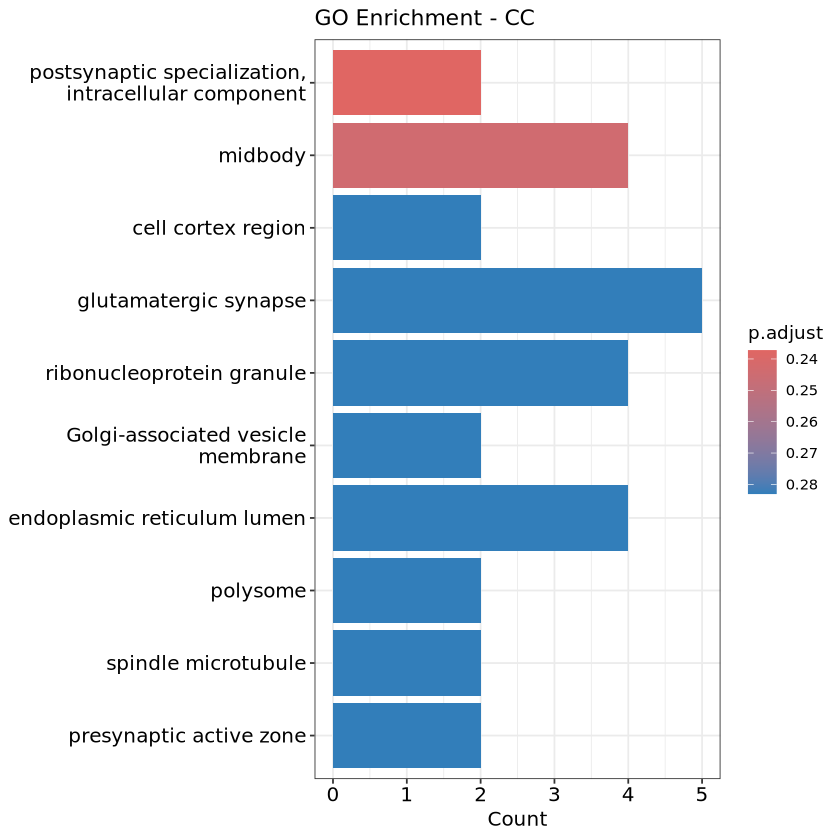

In [32]:
barplot(AD_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [33]:
AD_xQTL_ego_mf <- enrichGO(
  gene          = AD_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [34]:
head(AD_xQTL_ego_mf, n=5)

ID         Description                                             
GO:0004527 GO:0004527 exonuclease activity                                    
GO:0015036 GO:0015036 disulfide oxidoreductase activity                       
GO:0000175 GO:0000175 3'-5'-RNA exonuclease activity                          
GO:0016896 GO:0016896 RNA exonuclease activity, producing 5'-phosphomonoesters
GO:0001727 GO:0001727 lipid kinase activity                                   
           GeneRatio BgRatio  pvalue      p.adjust  qvalue   
GO:0004527 3/64      92/21059 0.002772774 0.2159536 0.1794628
GO:0015036 2/64      37/21059 0.005654329 0.2159536 0.1794628
GO:0000175 2/64      38/21059 0.005956830 0.2159536 0.1794628
GO:0016896 2/64      41/21059 0.006907708 0.2159536 0.1794628
GO:0001727 2/64      43/21059 0.007577319 0.2159536 0.1794628
           geneID                                          Count
GO:0004527 ENSG00000135473/ENSG00000144535/ENSG00000136960 3    
GO:0015036 ENSG00000086619/ENSG00000213593                 2    
GO:0000175 ENSG00000135473/ENSG00000144535                 2    
GO:0016896 ENSG00000135473/ENSG00000144535                 2    
GO:0001727 ENSG00000149091/ENSG00000241973                 2

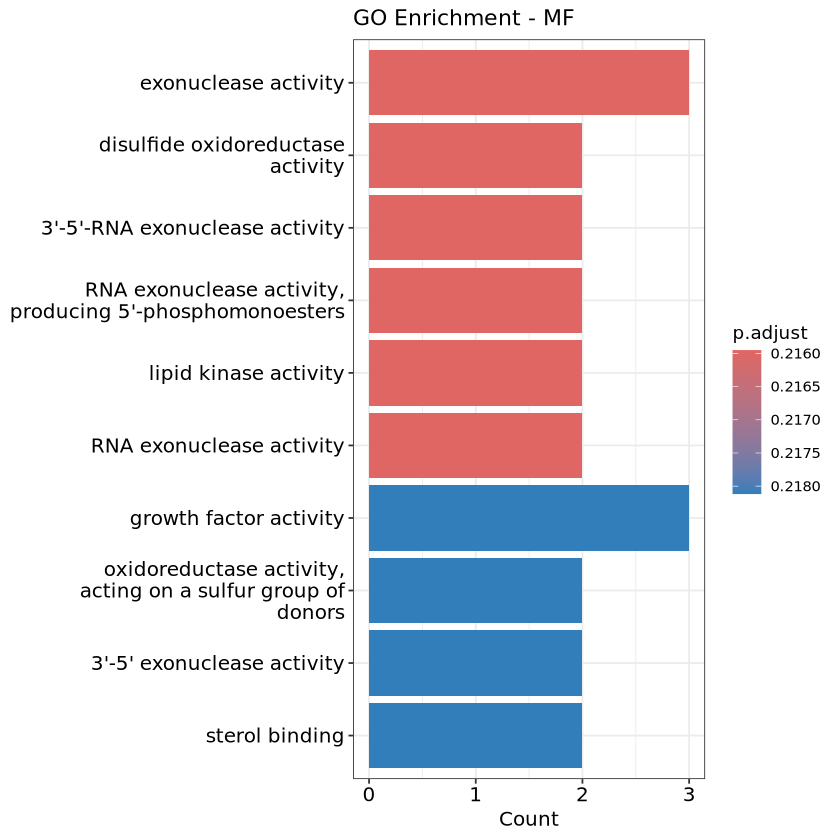

In [35]:
barplot(AD_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### AD2_Aging2(MTL)_xQTL

In [36]:
AD2_Aging2_xQTL_ego <- enrichGO(
  gene          = AD2_Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [37]:
head(AD2_Aging2_xQTL_ego, n=5)

ID         Description                                      
GO:0002690 GO:0002690 positive regulation of leukocyte chemotaxis      
GO:0071622 GO:0071622 regulation of granulocyte chemotaxis             
GO:0002688 GO:0002688 regulation of leukocyte chemotaxis               
GO:0071222 GO:0071222 cellular response to lipopolysaccharide          
GO:0045621 GO:0045621 positive regulation of lymphocyte differentiation
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0002690 4/64      113/21261 0.0003759659 0.2245966 0.1975277
GO:0071622 3/64      54/21261  0.0005783008 0.2245966 0.1975277
GO:0002688 4/64      147/21261 0.0010101925 0.2245966 0.1975277
GO:0071222 5/64      274/21261 0.0014055799 0.2245966 0.1975277
GO:0045621 4/64      162/21261 0.0014463289 0.2245966 0.1975277
           geneID                                                                         
GO:0002690 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000102882                
GO:0071622 ENSG00000110492/ENSG00000110944/ENSG00000102882                                
GO:0002688 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000102882                
GO:0071222 ENSG00000025434/ENSG00000066336/ENSG00000102882/ENSG00000175175/ENSG00000145901
GO:0045621 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000132842                
           Count
GO:0002690 4    
GO:0071622 3    
GO:0002688 4    
GO:0071222 5    
GO:0045621 4

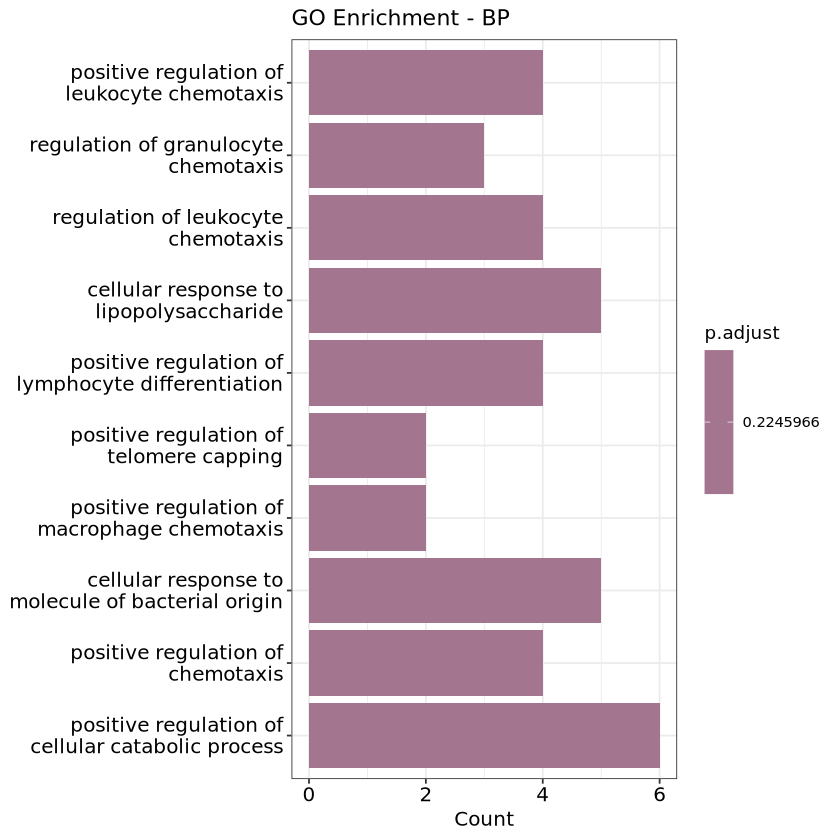

In [38]:
barplot(AD2_Aging2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [39]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_Aging2_sig_xqtl_BP.png', width = 6, height = 6)

In [40]:
AD2_Aging2_xQTL_ego_cc <- enrichGO(
  gene          = AD2_Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [41]:
head(AD2_Aging2_xQTL_ego_cc, n=5)

ID         Description                                         
GO:0098978 GO:0098978 glutamatergic synapse                               
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0031463 GO:0031463 Cul3-RING ubiquitin ligase complex                  
GO:0005788 GO:0005788 endoplasmic reticulum lumen                         
GO:0005657 GO:0005657 replication fork                                    
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0098978 7/64      440/22568 0.0002433456 0.03017486 0.02715225
GO:0099091 2/64      20/22568  0.0014554571 0.09023834 0.08119919
GO:0031463 2/64      36/22568  0.0046871760 0.19373661 0.17433006
GO:0005788 4/64      337/22568 0.0153793067 0.28015203 0.25208926
GO:0005657 2/64      67/22568  0.0155495534 0.28015203 0.25208926
           geneID                                                                                                         
GO:0098978 ENSG00000156599/ENSG00000198561/ENSG00000110975/ENSG00000149927/ENSG00000102882/ENSG00000135905/ENSG00000118407
GO:0099091 ENSG00000156599/ENSG00000198561                                                                                
GO:0031463 ENSG00000174943/ENSG00000122550                                                                                
GO:0005788 ENSG00000086619/ENSG00000110944/ENSG00000102882/ENSG00000038427                                                
GO:0005657 ENSG00000108384/ENSG00000106399                                                                                
           Count
GO:0098978 7    
GO:0099091 2    
GO:0031463 2    
GO:0005788 4    
GO:0005657 2

In [42]:
interest_gene = strsplit(AD2_Aging2_xQTL_ego_cc$geneID[1], split = "/")[[1]]
combined_image_sig_xqtl |> filter(gene_id %in% interest_gene)


#chr  start     end       gene_id         strand gene_name outcomes    
1 chr11  57667746  57701181 ENSG00000156599 +      ZDHHC5    image_AD2   
2 chr11  57753242  57819545 ENSG00000198561 +      CTNND1    image_AD2   
3 chr12  33374237  33439818 ENSG00000110975 -      SYT10     image_Aging2
4 chr16  30005513  30023269 ENSG00000149927 -      DOC2A     image_Aging2
5 chr16  30005513  30023269 ENSG00000149927 -      DOC2A     image_Aging3
6 chr16  30114104  30123505 ENSG00000102882 -      MAPK3     image_Aging2
7 chr16  30114104  30123505 ENSG00000102882 -      MAPK3     image_Aging3
8 chr2  224765089 225042467 ENSG00000135905 -      DOCK10    image_Aging2
9 chr6   75291858  75493799 ENSG00000118407 -      FILIP1    image_AD2   
  resource_in_FunGen_xQTL data_resources  
1 ColocBoost              FunGen_xQTL     
2 ColocBoost              FunGen_xQTL     
3 ColocBoost              FunGen_xQTL     
4 ColocBoost              ADSP_GVC_table_1
5 ColocBoost              ADSP_GVC_table_1
6 ColocBoost              FunGen_xQTL     
7 ColocBoost              FunGen_xQTL     
8 ColocBoost              FunGen_xQTL     
9 ColocBoost              FunGen_xQTL

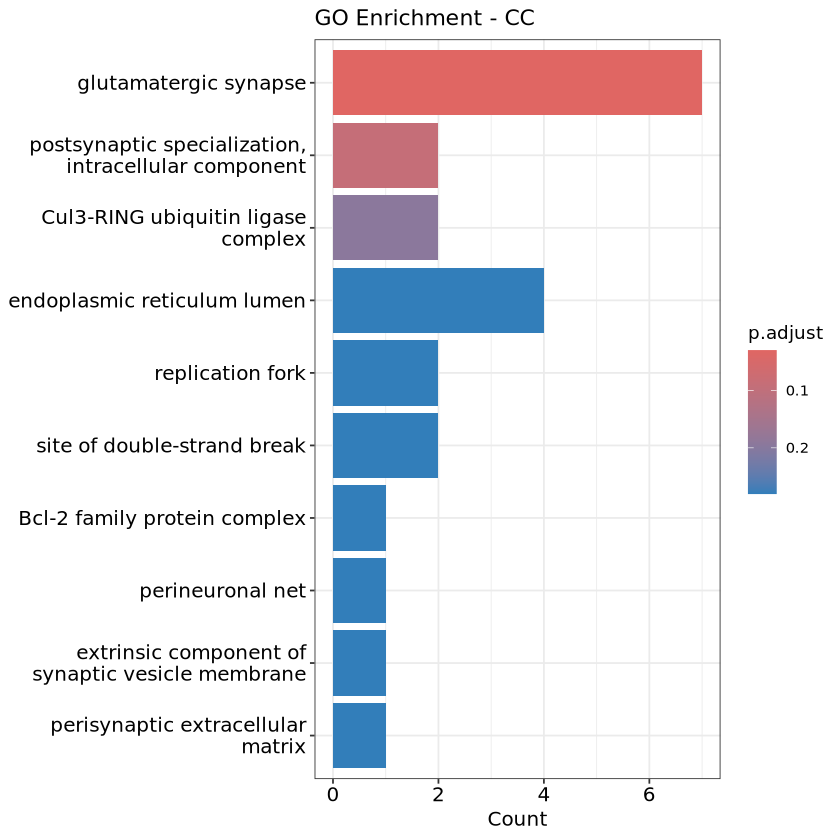

In [43]:
barplot(AD2_Aging2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [44]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_Aging2_sig_xqtl_CC.png', width = 6, height = 6)

In [45]:
AD2_Aging2_xQTL_ego_mf <- enrichGO(
  gene          = AD2_Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [46]:
head(AD2_Aging2_xQTL_ego_mf, n=5)

ID         Description                                             
GO:0004722 GO:0004722 protein serine/threonine phosphatase activity           
GO:0015036 GO:0015036 disulfide oxidoreductase activity                       
GO:0000175 GO:0000175 3'-5'-RNA exonuclease activity                          
GO:0042162 GO:0042162 telomeric DNA binding                                   
GO:0016896 GO:0016896 RNA exonuclease activity, producing 5'-phosphomonoesters
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0004722 3/66      108/21059 0.004748096 0.2205844 0.1825341
GO:0015036 2/66      37/21059  0.006002901 0.2205844 0.1825341
GO:0000175 2/66      38/21059  0.006323655 0.2205844 0.1825341
GO:0042162 2/66      40/21059  0.006988113 0.2205844 0.1825341
GO:0016896 2/66      41/21059  0.007331717 0.2205844 0.1825341
           geneID                                          Count
GO:0004722 ENSG00000141298/ENSG00000108389/ENSG00000175175 3    
GO:0015036 ENSG00000086619/ENSG00000213593                 2    
GO:0000175 ENSG00000135473/ENSG00000144535                 2    
GO:0042162 ENSG00000139579/ENSG00000205189                 2    
GO:0016896 ENSG00000135473/ENSG00000144535                 2

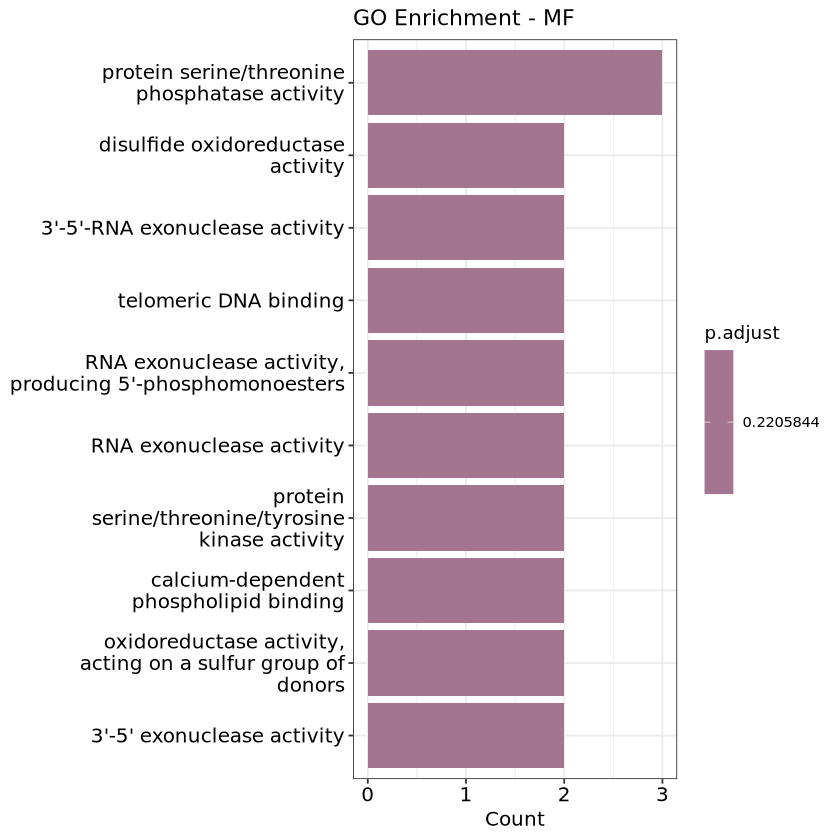

In [47]:
barplot(AD2_Aging2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [48]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_Aging2_sig_xqtl_MF.png', width = 6, height = 6)

### image_AD1_xQTL list

In [49]:
AD1_xQTL_ego <- enrichGO(
  gene          = AD1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [50]:
head(AD1_xQTL_ego, n=5)

ID         Description                                      
GO:0007269 GO:0007269 neurotransmitter secretion                       
GO:0099643 GO:0099643 signal release from synapse                      
GO:0098876 GO:0098876 vesicle-mediated transport to the plasma membrane
GO:0035459 GO:0035459 vesicle cargo loading                            
GO:0021532 GO:0021532 neural tube patterning                           
           GeneRatio BgRatio   pvalue       p.adjust qvalue  
GO:0007269 3/28      149/21261 0.0009717588 0.137963 0.103937
GO:0099643 3/28      149/21261 0.0009717588 0.137963 0.103937
GO:0098876 3/28      163/21261 0.0012588533 0.137963 0.103937
GO:0035459 2/28      40/21261  0.0012648090 0.137963 0.103937
GO:0021532 2/28      42/21261  0.0013938847 0.137963 0.103937
           geneID                                          Count
GO:0007269 ENSG00000099940/ENSG00000128271/ENSG00000114646 3    
GO:0099643 ENSG00000099940/ENSG00000128271/ENSG00000114646 3    
GO:0098876 ENSG00000138175/ENSG00000188042/ENSG00000137177 3    
GO:0035459 ENSG00000114650/ENSG00000137177                 2    
GO:0021532 ENSG00000107882/ENSG00000089094                 2

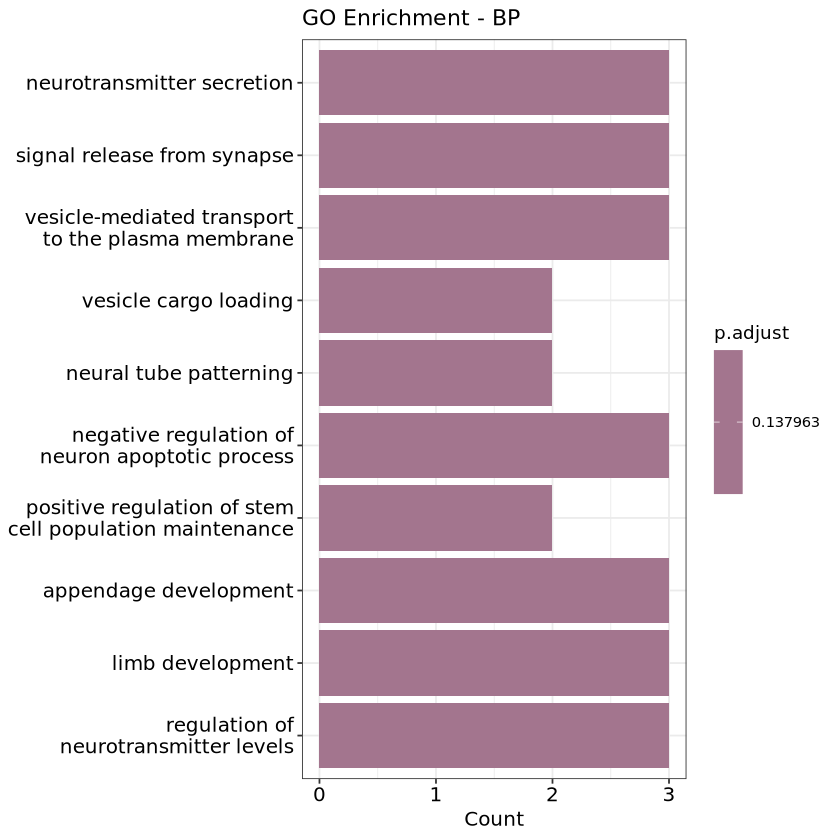

In [51]:
barplot(AD1_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [52]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD1_sig_xqtl_GO.png', width = 6, height = 6)

In [53]:
AD1_xQTL_ego_cc <- enrichGO(
  gene          = AD1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [54]:
head(AD1_xQTL_ego_cc, n=5)

ID         Description                            GeneRatio
GO:0030660 GO:0030660 Golgi-associated vesicle membrane      2/31     
GO:0005798 GO:0005798 Golgi-associated vesicle               2/31     
GO:0071014 GO:0071014 post-mRNA release spliceosomal complex 1/31     
GO:0016605 GO:0016605 PML body                               2/31     
GO:0016363 GO:0016363 nuclear matrix                         2/31     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0030660 60/22568  0.003075710 0.1831888 0.1598233
GO:0005798 101/22568 0.008474054 0.1831888 0.1598233
GO:0071014 10/22568  0.013654372 0.1831888 0.1598233
GO:0016605 133/22568 0.014334656 0.1831888 0.1598233
GO:0016363 134/22568 0.014539505 0.1831888 0.1598233
           geneID                          Count
GO:0030660 ENSG00000241973/ENSG00000114646 2    
GO:0005798 ENSG00000241973/ENSG00000114646 2    
GO:0071014 ENSG00000160799                 1    
GO:0016605 ENSG00000171206/ENSG00000105229 2    
GO:0016363 ENSG00000105229/ENSG00000173473 2

In [55]:
barplot(AD1_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [56]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD1_sig_xqtl_GO_CC.png', width = 6, height = 6)

In [57]:
AD1_xQTL_ego_mf <- enrichGO(
  gene          = AD1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [58]:
head(AD1_xQTL_ego_mf, n=5)

ID         Description                                  GeneRatio
GO:0003924 GO:0003924 GTPase activity                              4/31     
GO:0005525 GO:0005525 GTP binding                                  4/31     
GO:0019001 GO:0019001 guanyl nucleotide binding                    4/31     
GO:0032561 GO:0032561 guanyl ribonucleotide binding                4/31     
GO:0035256 GO:0035256 G protein-coupled glutamate receptor binding 1/31     
           BgRatio   pvalue      p.adjust   qvalue   
GO:0003924 353/21059 0.001707877 0.09380727 0.0752339
GO:0005525 411/21059 0.002964689 0.09380727 0.0752339
GO:0019001 433/21059 0.003573610 0.09380727 0.0752339
GO:0032561 433/21059 0.003573610 0.09380727 0.0752339
GO:0035256 10/21059  0.014626521 0.19549029 0.1567842
           geneID                                                         
GO:0003924 ENSG00000138175/ENSG00000167658/ENSG00000188042/ENSG00000146535
GO:0005525 ENSG00000138175/ENSG00000167658/ENSG00000188042/ENSG00000146535
GO:0019001 ENSG00000138175/ENSG00000167658/ENSG00000188042/ENSG00000146535
GO:0032561 ENSG00000138175/ENSG00000167658/ENSG00000188042/ENSG00000146535
GO:0035256 ENSG00000128271                                                
           Count
GO:0003924 4    
GO:0005525 4    
GO:0019001 4    
GO:0032561 4    
GO:0035256 1

In [59]:
barplot(AD1_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [60]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD1_sig_xqtl_GO_MF.png', width = 6, height = 6)

### image_AD2_xQTL list

In [61]:
AD2_xQTL_ego <- enrichGO(
  gene          = AD2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [62]:
head(AD2_xQTL_ego, n=5)

ID         Description                                      
GO:0045621 GO:0045621 positive regulation of lymphocyte differentiation
GO:1902107 GO:1902107 positive regulation of leukocyte differentiation 
GO:1903708 GO:1903708 positive regulation of hemopoiesis               
GO:0045619 GO:0045619 regulation of lymphocyte differentiation         
GO:0090023 GO:0090023 positive regulation of neutrophil chemotaxis     
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0045621 4/35      162/21261 0.0001414520 0.1146671 0.0852504
GO:1902107 4/35      232/21261 0.0005546303 0.1146671 0.0852504
GO:1903708 4/35      232/21261 0.0005546303 0.1146671 0.0852504
GO:0045619 4/35      251/21261 0.0007447310 0.1146671 0.0852504
GO:0090023 2/35      25/21261  0.0007712403 0.1146671 0.0852504
           geneID                                                         
GO:0045621 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000132842
GO:1902107 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000132842
GO:1903708 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000132842
GO:0045619 ENSG00000110492/ENSG00000066336/ENSG00000110944/ENSG00000132842
GO:0090023 ENSG00000110492/ENSG00000110944                                
           Count
GO:0045621 4    
GO:1902107 4    
GO:1903708 4    
GO:0045619 4    
GO:0090023 2

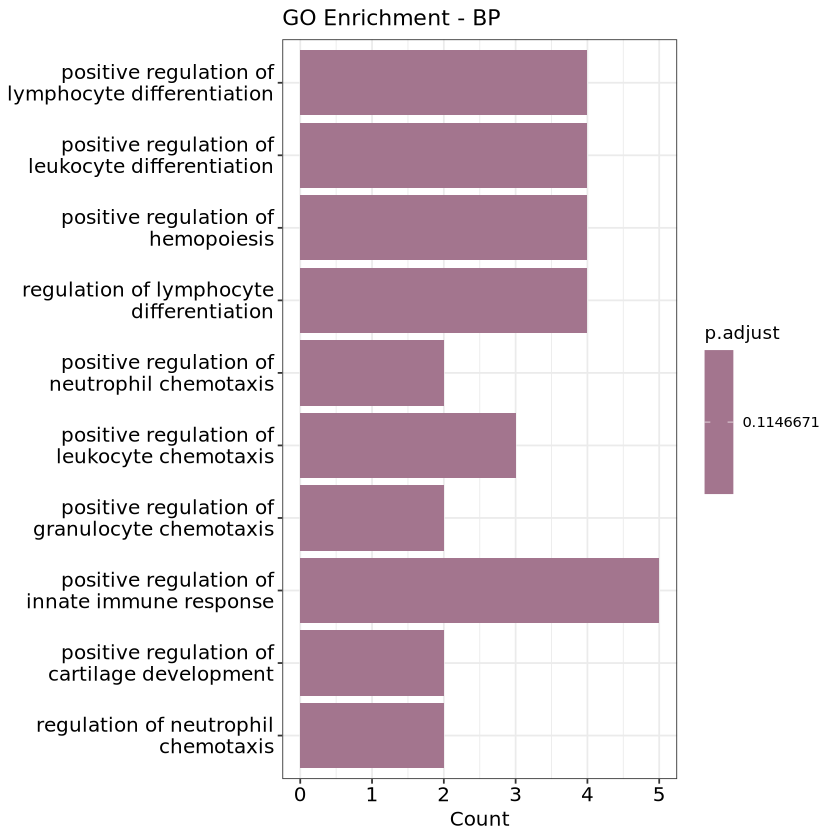

In [63]:
barplot(AD2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [64]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_sig_xqtl_GO.png', width = 6, height = 6)

In [65]:
AD2_xQTL_ego_cc <- enrichGO(
  gene          = AD2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [66]:
head(AD2_xQTL_ego_cc, n=5)

ID         Description                                         
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0035770 GO:0035770 ribonucleoprotein granule                           
GO:0005788 GO:0005788 endoplasmic reticulum lumen                         
GO:0000932 GO:0000932 P-body                                              
GO:0072534 GO:0072534 perineuronal net                                    
           GeneRatio BgRatio   pvalue      p.adjust   qvalue    
GO:0099091 2/35      20/22568  0.000436229 0.03577077 0.02984724
GO:0035770 3/35      312/22568 0.012353818 0.20479511 0.17088167
GO:0005788 3/35      337/22568 0.015175142 0.20479511 0.17088167
GO:0000932 2/35      123/22568 0.015589656 0.20479511 0.17088167
GO:0072534 1/35      11/22568  0.016931604 0.20479511 0.17088167
           geneID                                          Count
GO:0099091 ENSG00000156599/ENSG00000198561                 2    
GO:0035770 ENSG00000135473/ENSG00000144535/ENSG00000136270 3    
GO:0005788 ENSG00000086619/ENSG00000110944/ENSG00000038427 3    
GO:0000932 ENSG00000135473/ENSG00000144535                 2    
GO:0072534 ENSG00000038427                                 1

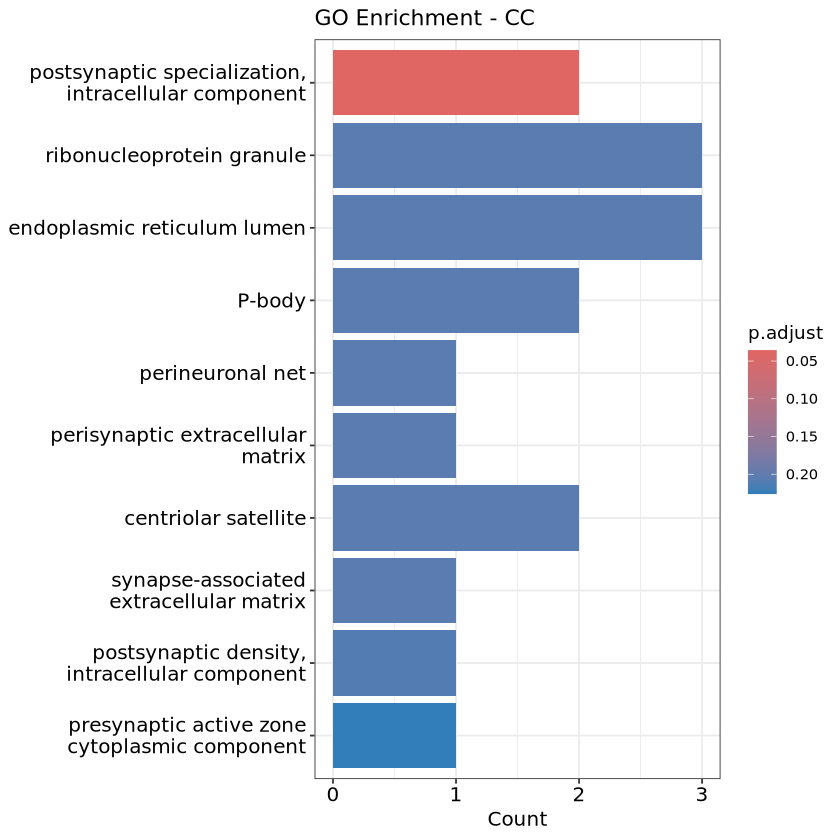

In [67]:
barplot(AD2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [68]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_sig_xqtl_GO_CC.png', width = 6, height = 6)

In [69]:
AD2_xQTL_ego_mf <- enrichGO(
  gene          = AD2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [70]:
head(AD2_xQTL_ego_mf, n=5)

ID        
GO:0015036 GO:0015036
GO:0000175 GO:0000175
GO:0016896 GO:0016896
GO:0004532 GO:0004532
GO:0016667 GO:0016667
           Description                                                
GO:0015036 disulfide oxidoreductase activity                          
GO:0000175 3'-5'-RNA exonuclease activity                             
GO:0016896 RNA exonuclease activity, producing 5'-phosphomonoesters   
GO:0004532 RNA exonuclease activity                                   
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors
           GeneRatio BgRatio  pvalue      p.adjust   qvalue    
GO:0015036 2/35      37/21059 0.001723070 0.05281821 0.03482519
GO:0000175 2/35      38/21059 0.001816902 0.05281821 0.03482519
GO:0016896 2/35      41/21059 0.002112676 0.05281821 0.03482519
GO:0004532 2/35      43/21059 0.002321680 0.05281821 0.03482519
GO:0016667 2/35      60/21059 0.004471019 0.06794903 0.04480156
           geneID                          Count
GO:0015036 ENSG00000086619/ENSG00000213593 2    
GO:0000175 ENSG00000135473/ENSG00000144535 2    
GO:0016896 ENSG00000135473/ENSG00000144535 2    
GO:0004532 ENSG00000135473/ENSG00000144535 2    
GO:0016667 ENSG00000086619/ENSG00000213593 2

In [71]:
barplot(AD2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [72]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_sig_xqtl_GO_MF.png', width = 6, height = 6)

### image_Aging1_xQTL list

In [73]:
Aging1_xQTL_ego <- enrichGO(
  gene          = Aging1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [74]:
head(Aging1_xQTL_ego, n=5)

ID         Description                                              
GO:1904869 GO:1904869 regulation of protein localization to Cajal body         
GO:1904871 GO:1904871 positive regulation of protein localization to Cajal body
GO:0006068 GO:0006068 ethanol catabolic process                                
GO:1903405 GO:1903405 protein localization to nuclear body                     
GO:1904867 GO:1904867 protein localization to Cajal body                       
           GeneRatio BgRatio  pvalue       p.adjust   qvalue    
GO:1904869 2/56      12/21261 0.0004421738 0.09192102 0.08544662
GO:1904871 2/56      12/21261 0.0004421738 0.09192102 0.08544662
GO:0006068 2/56      13/21261 0.0005216857 0.09192102 0.08544662
GO:1903405 2/56      13/21261 0.0005216857 0.09192102 0.08544662
GO:1904867 2/56      13/21261 0.0005216857 0.09192102 0.08544662
           geneID                          Count
GO:1904869 ENSG00000120438/ENSG00000146834 2    
GO:1904871 ENSG00000120438/ENSG00000146834 2    
GO:0006068 ENSG00000197165/ENSG00000196502 2    
GO:1903405 ENSG00000120438/ENSG00000146834 2    
GO:1904867 ENSG00000120438/ENSG00000146834 2

In [75]:
barplot(Aging1_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [76]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging1_sig_xqtl_BP.png', width = 6, height = 6)

In [77]:
Aging1_xQTL_ego_cc <- enrichGO(
  gene          = Aging1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [78]:
head(Aging1_xQTL_ego_cc, n=5)

ID         Description                       GeneRatio BgRatio 
GO:0034364 GO:0034364 high-density lipoprotein particle 2/58      33/22568
GO:0000795 GO:0000795 synaptonemal complex              2/58      42/22568
GO:0099086 GO:0099086 synaptonemal structure            2/58      42/22568
GO:0034358 GO:0034358 plasma lipoprotein particle       2/58      44/22568
GO:1990777 GO:1990777 lipoprotein particle              2/58      44/22568
           pvalue      p.adjust qvalue    geneID                          Count
GO:0034364 0.003256390 0.175478 0.1507434 ENSG00000148965/ENSG00000134339 2    
GO:0000795 0.005232071 0.175478 0.1507434 ENSG00000119684/ENSG00000066923 2    
GO:0099086 0.005232071 0.175478 0.1507434 ENSG00000119684/ENSG00000066923 2    
GO:0034358 0.005729724 0.175478 0.1507434 ENSG00000148965/ENSG00000134339 2    
GO:1990777 0.005729724 0.175478 0.1507434 ENSG00000148965/ENSG00000134339 2

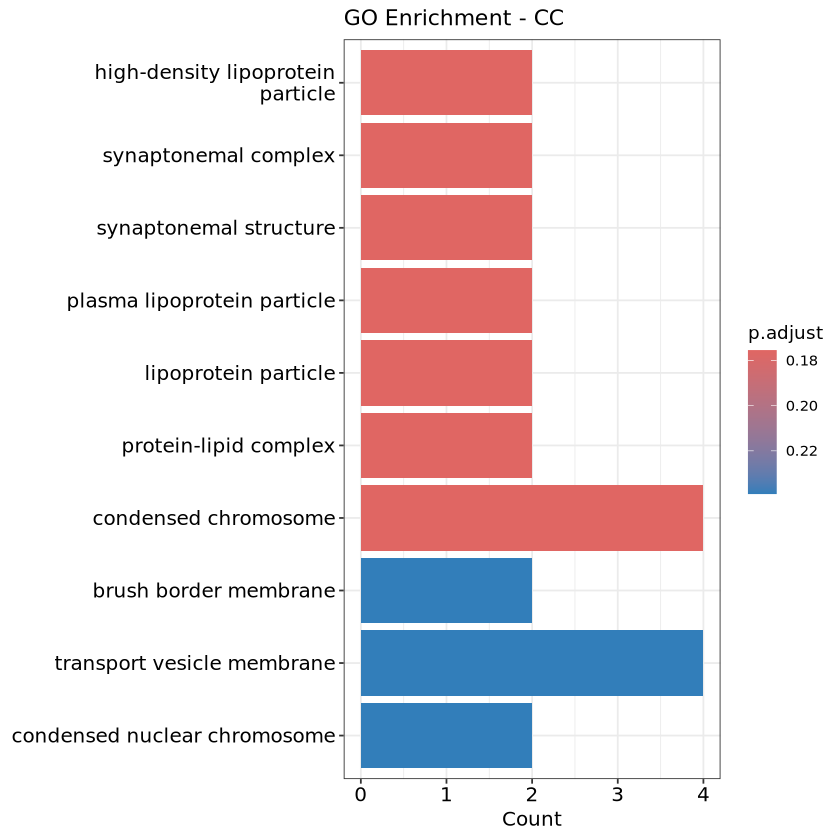

In [79]:
barplot(Aging1_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [80]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging1_sig_xqtl_CC.png', width = 6, height = 6)

In [81]:
Aging1_xQTL_ego_mf <- enrichGO(
  gene          = Aging1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [82]:
head(Aging1_xQTL_ego_mf, n=5)

ID         Description                                         
GO:0004062 GO:0004062 aryl sulfotransferase activity                      
GO:0008135 GO:0008135 translation factor activity, RNA binding            
GO:0090079 GO:0090079 translation regulator activity, nucleic acid binding
GO:0042288 GO:0042288 MHC class I protein binding                         
GO:0003743 GO:0003743 translation initiation factor activity              
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0004062 2/56      10/21059  0.0003082954 0.04655261 0.03894258
GO:0008135 3/56      97/21059  0.0022003527 0.16612663 0.13896964
GO:0090079 3/56      123/21059 0.0043017848 0.21652317 0.18112778
GO:0042288 2/56      51/21059  0.0081461141 0.21773838 0.18214434
GO:0003743 2/56      52/21059  0.0084576031 0.21773838 0.18214434
           geneID                                          Count
GO:0004062 ENSG00000197165/ENSG00000196502                 2    
GO:0008135 ENSG00000119718/ENSG00000184110/ENSG00000178952 3    
GO:0090079 ENSG00000119718/ENSG00000184110/ENSG00000178952 3    
GO:0042288 ENSG00000121716/ENSG00000085514                 2    
GO:0003743 ENSG00000119718/ENSG00000184110                 2

In [83]:
barplot(Aging1_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [84]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging1_sig_xqtl_MF.png', width = 6, height = 6)

### image_Aging2_xQTL list

In [85]:
Aging2_xQTL_ego <- enrichGO(
  gene          = Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [86]:
head(Aging2_xQTL_ego, n=5)

ID         Description                                    GeneRatio
GO:0017158 GO:0017158 regulation of calcium ion-dependent exocytosis 2/35     
GO:0000723 GO:0000723 telomere maintenance                           3/35     
GO:0032200 GO:0032200 telomere organization                          3/35     
GO:0006470 GO:0006470 protein dephosphorylation                      3/35     
GO:0017156 GO:0017156 calcium-ion regulated exocytosis               2/35     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0017158 44/21261  0.002384745 0.2786997 0.2425068
GO:0000723 185/21261 0.003456950 0.2786997 0.2425068
GO:0032200 218/21261 0.005464666 0.2786997 0.2425068
GO:0006470 229/21261 0.006260978 0.2786997 0.2425068
GO:0017156 73/21261  0.006429922 0.2786997 0.2425068
           geneID                                          Count
GO:0017158 ENSG00000110975/ENSG00000149927                 2    
GO:0000723 ENSG00000102882/ENSG00000108384/ENSG00000106399 3    
GO:0032200 ENSG00000102882/ENSG00000108384/ENSG00000106399 3    
GO:0006470 ENSG00000141298/ENSG00000108389/ENSG00000175175 3    
GO:0017156 ENSG00000110975/ENSG00000149927                 2

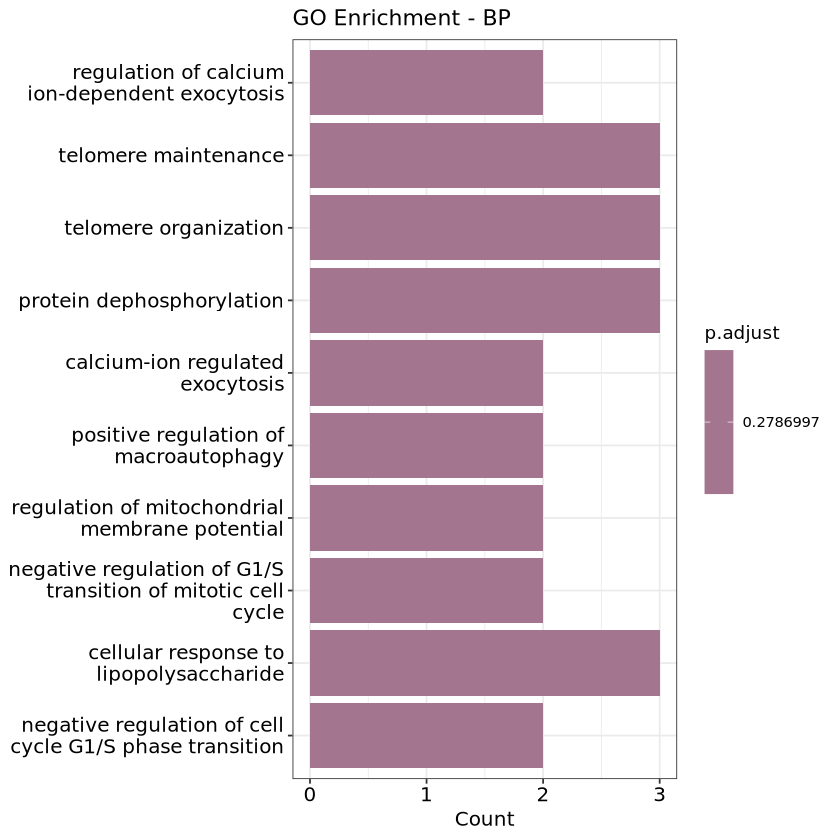

In [87]:
barplot(Aging2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [88]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging2_sig_xqtl_BP.png', width = 6, height = 6)

In [89]:
Aging2_xQTL_ego_cc <- enrichGO(
  gene          = Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [90]:
head(Aging2_xQTL_ego_cc, n=5)

ID         Description                        GeneRatio BgRatio  
GO:0031463 GO:0031463 Cul3-RING ubiquitin ligase complex 2/35      36/22568 
GO:0098978 GO:0098978 glutamatergic synapse              4/35      440/22568
GO:0005657 GO:0005657 replication fork                   2/35      67/22568 
GO:0070382 GO:0070382 exocytic vesicle                   3/35      258/22568
GO:0000151 GO:0000151 ubiquitin ligase complex           3/35      335/22568
           pvalue      p.adjust  qvalue    
GO:0031463 0.001424096 0.0968385 0.06745716
GO:0098978 0.004627039 0.1005092 0.07001415
GO:0005657 0.004849682 0.1005092 0.07001415
GO:0070382 0.007378991 0.1005092 0.07001415
GO:0000151 0.014937099 0.1005092 0.07001415
           geneID                                                         
GO:0031463 ENSG00000174943/ENSG00000122550                                
GO:0098978 ENSG00000110975/ENSG00000149927/ENSG00000102882/ENSG00000135905
GO:0005657 ENSG00000108384/ENSG00000106399                                
GO:0070382 ENSG00000110975/ENSG00000149927/ENSG00000171552                
GO:0000151 ENSG00000127334/ENSG00000174943/ENSG00000122550                
           Count
GO:0031463 2    
GO:0098978 4    
GO:0005657 2    
GO:0070382 3    
GO:0000151 3

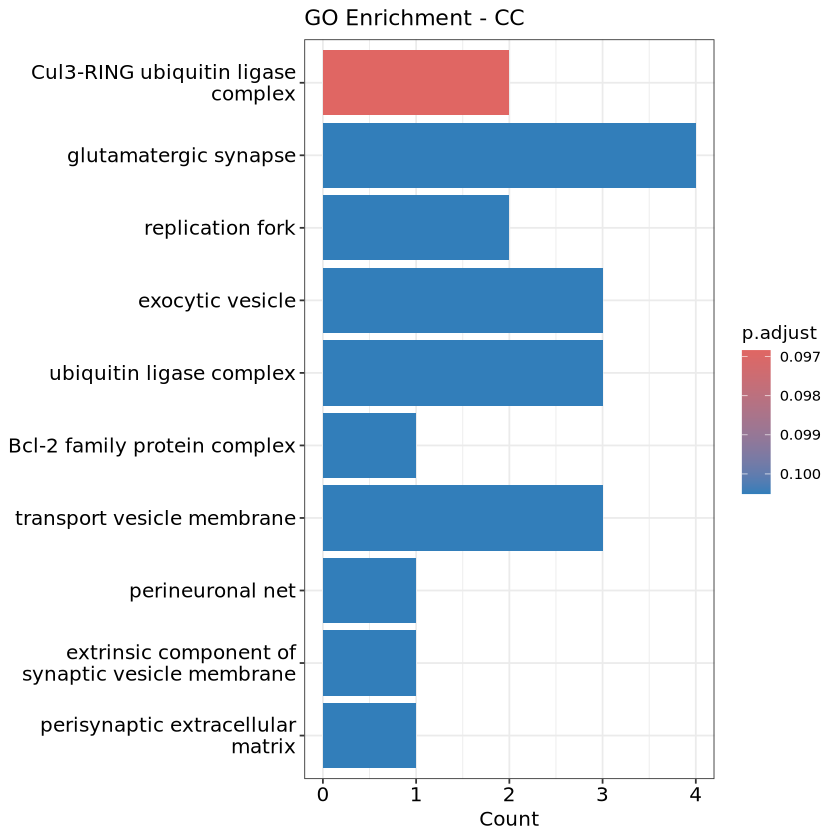

In [91]:
barplot(Aging2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [92]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging2_sig_xqtl_CC.png', width = 6, height = 6)

In [93]:
Aging2_xQTL_ego_mf <- enrichGO(
  gene          = Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [94]:
head(Aging2_xQTL_ego_mf, n=5)

ID         Description                                      
GO:0004722 GO:0004722 protein serine/threonine phosphatase activity    
GO:0004712 GO:0004712 protein serine/threonine/tyrosine kinase activity
GO:0046982 GO:0046982 protein heterodimerization activity              
GO:0005544 GO:0005544 calcium-dependent phospholipid binding           
GO:0004721 GO:0004721 phosphoprotein phosphatase activity              
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0004722 3/37      108/21059 0.0008977407 0.08105165 0.06129609
GO:0004712 2/37      49/21059  0.0033533570 0.08105165 0.06129609
GO:0046982 4/37      360/21059 0.0035539492 0.08105165 0.06129609
GO:0005544 2/37      57/21059  0.0045110079 0.08105165 0.06129609
GO:0004721 3/37      192/21059 0.0046154409 0.08105165 0.06129609
           geneID                                                         
GO:0004722 ENSG00000141298/ENSG00000108389/ENSG00000175175                
GO:0004712 ENSG00000127334/ENSG00000102882                                
GO:0046982 ENSG00000110975/ENSG00000120669/ENSG00000171552/ENSG00000203760
GO:0005544 ENSG00000110975/ENSG00000149927                                
GO:0004721 ENSG00000141298/ENSG00000108389/ENSG00000175175                
           Count
GO:0004722 3    
GO:0004712 2    
GO:0046982 4    
GO:0005544 2    
GO:0004721 3

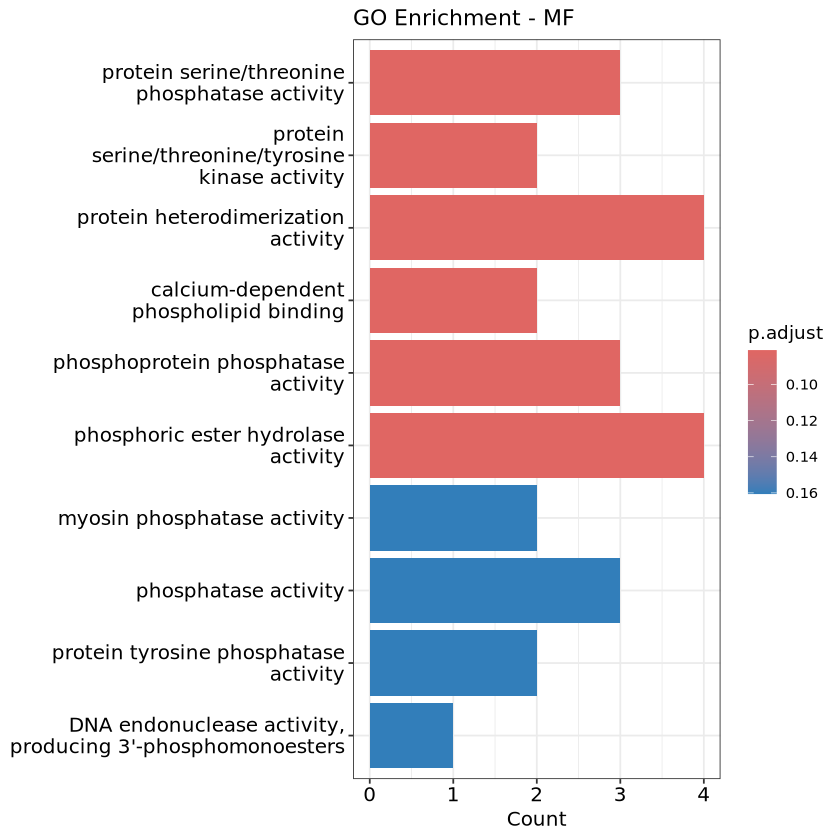

In [95]:
barplot(Aging2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [96]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging2_sig_xqtl_MF.png', width = 6, height = 6)

### image_Aging3_xQTL list

In [97]:
Aging3_xQTL_ego <- enrichGO(
  gene          = Aging3_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [98]:
head(Aging3_xQTL_ego, n=5)

ID         Description                             GeneRatio
GO:0031281 GO:0031281 positive regulation of cyclase activity 3/39     
GO:0035934 GO:0035934 corticosterone secretion                2/39     
GO:0051866 GO:0051866 general adaptation syndrome             2/39     
GO:0051458 GO:0051458 corticotropin secretion                 2/39     
GO:0031279 GO:0031279 regulation of cyclase activity          3/39     
           BgRatio  pvalue       p.adjust   qvalue    
GO:0031281 45/21261 7.676853e-05 0.04312512 0.03435721
GO:0035934 10/21261 1.461779e-04 0.04312512 0.03435721
GO:0051866 10/21261 1.461779e-04 0.04312512 0.03435721
GO:0051458 11/21261 1.784548e-04 0.04312512 0.03435721
GO:0031279 61/21261 1.907974e-04 0.04312512 0.03435721
           geneID                                          Count
GO:0031281 ENSG00000102882/ENSG00000263715/ENSG00000120088 3    
GO:0035934 ENSG00000263715/ENSG00000120088                 2    
GO:0051866 ENSG00000263715/ENSG00000120088                 2    
GO:0051458 ENSG00000263715/ENSG00000120088                 2    
GO:0031279 ENSG00000102882/ENSG00000263715/ENSG00000120088 3

In [99]:
barplot(Aging3_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [100]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging3_sig_xqtl_BP.png', width = 6, height = 6)

In [101]:
Aging3_xQTL_ego_cc <- enrichGO(
  gene          = Aging3_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [102]:
head(Aging3_xQTL_ego_cc, n=5)

ID         Description           GeneRatio BgRatio   pvalue      
GO:0044754 GO:0044754 autolysosome          2/42      16/22568  0.0003990834
GO:0005767 GO:0005767 secondary lysosome    2/42      23/22568  0.0008344788
GO:0030673 GO:0030673 axolemma              2/42      26/22568  0.0010681728
GO:0098978 GO:0098978 glutamatergic synapse 5/42      440/22568 0.0012933028
GO:0031256 GO:0031256 leading edge membrane 3/42      200/22568 0.0061048819
           p.adjust   qvalue    
GO:0044754 0.04494227 0.03607634
GO:0005767 0.04494227 0.03607634
GO:0030673 0.04494227 0.03607634
GO:0098978 0.04494227 0.03607634
GO:0031256 0.16100231 0.12924078
           geneID                                                                         
GO:0044754 ENSG00000225190/ENSG00000101460                                                
GO:0005767 ENSG00000225190/ENSG00000101460                                                
GO:0030673 ENSG00000186868/ENSG00000115306                                                
GO:0098978 ENSG00000070831/ENSG00000149927/ENSG00000102882/ENSG00000115306/ENSG00000101460
GO:0031256 ENSG00000070831/ENSG00000186868/ENSG00000115306                                
           Count
GO:0044754 2    
GO:0005767 2    
GO:0030673 2    
GO:0098978 5    
GO:0031256 3

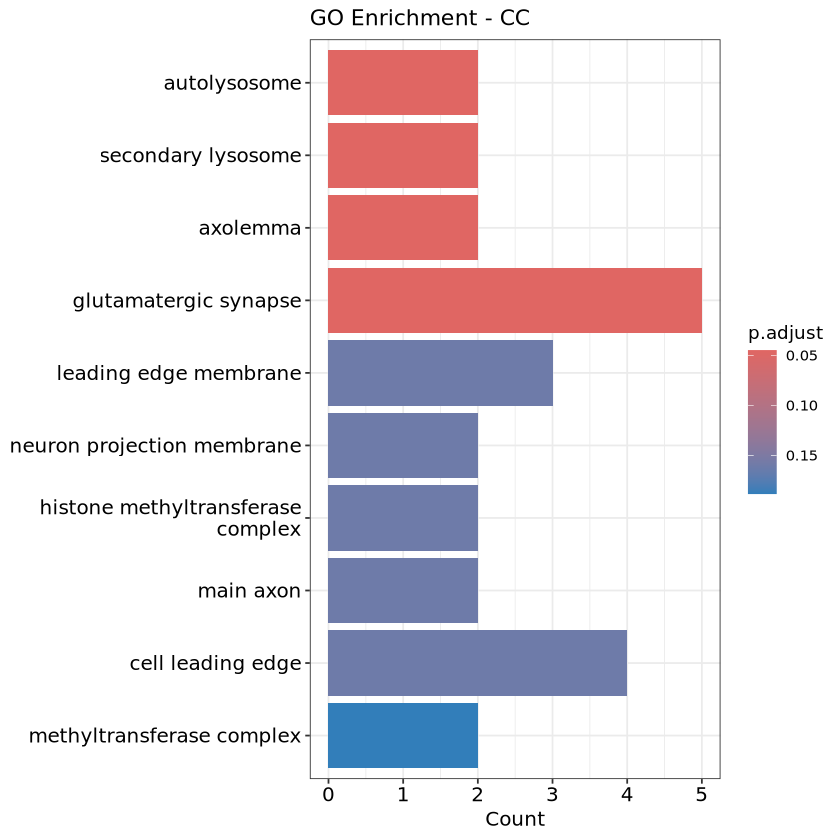

In [103]:
barplot(Aging3_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [104]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging3_sig_xqtl_CC.png', width = 6, height = 6)

In [105]:
Aging3_xQTL_ego_mf <- enrichGO(
  gene          = Aging3_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [106]:
head(Aging3_xQTL_ego_mf, n=5)

ID         Description                   GeneRatio BgRatio  
GO:0003924 GO:0003924 GTPase activity               4/40      353/21059
GO:0017046 GO:0017046 peptide hormone binding       2/40      55/21059 
GO:0005525 GO:0005525 GTP binding                   4/40      411/21059
GO:0019001 GO:0019001 guanyl nucleotide binding     4/40      433/21059
GO:0032561 GO:0032561 guanyl ribonucleotide binding 4/40      433/21059
           pvalue      p.adjust  qvalue   
GO:0003924 0.004407990 0.1575575 0.1167958
GO:0017046 0.004901974 0.1575575 0.1167958
GO:0005525 0.007505367 0.1575575 0.1167958
GO:0019001 0.008981071 0.1575575 0.1167958
GO:0032561 0.008981071 0.1575575 0.1167958
           geneID                                                         
GO:0003924 ENSG00000070831/ENSG00000228696/ENSG00000185829/ENSG00000100226
GO:0017046 ENSG00000263715/ENSG00000120088                                
GO:0005525 ENSG00000070831/ENSG00000228696/ENSG00000185829/ENSG00000100226
GO:0019001 ENSG00000070831/ENSG00000228696/ENSG00000185829/ENSG00000100226
GO:0032561 ENSG00000070831/ENSG00000228696/ENSG00000185829/ENSG00000100226
           Count
GO:0003924 4    
GO:0017046 2    
GO:0005525 4    
GO:0019001 4    
GO:0032561 4

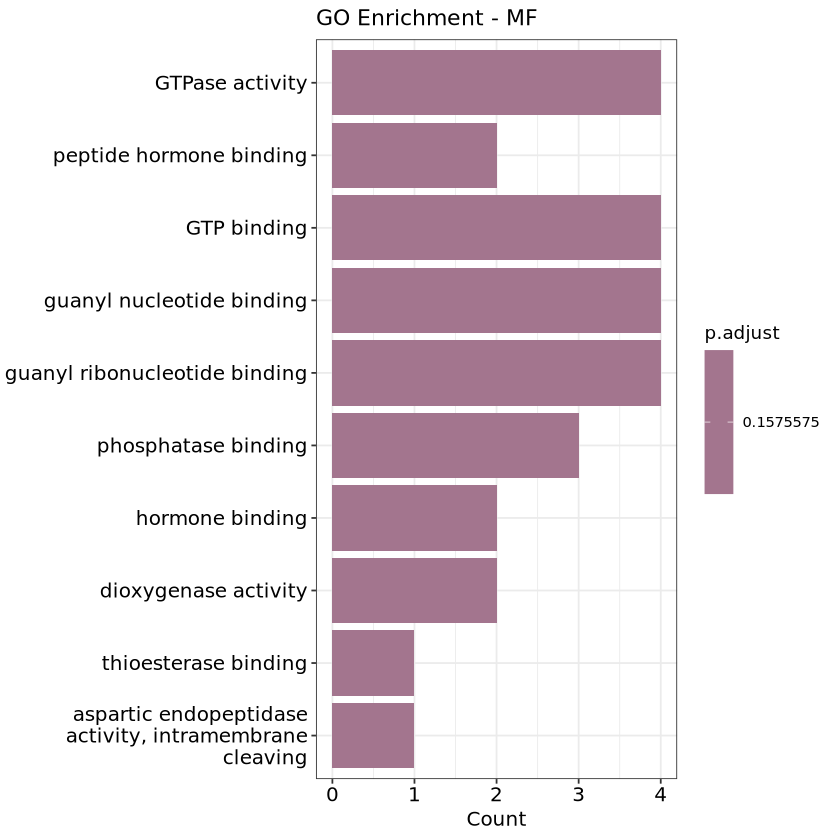

In [107]:
barplot(Aging3_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [108]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging3_sig_xqtl_MF.png', width = 6, height = 6)

### image_Aging4_xQTL list

In [109]:
Aging4_xQTL_ego <- enrichGO(
  gene          = Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [110]:
head(Aging4_xQTL_ego, n=5)

ID         Description                     GeneRatio BgRatio 
GO:0042181 GO:0042181 ketone biosynthetic process     3/41      48/21261
GO:0006744 GO:0006744 ubiquinone biosynthetic process 2/41      17/21261
GO:1901663 GO:1901663 quinone biosynthetic process    2/41      17/21261
GO:0006743 GO:0006743 ubiquinone metabolic process    2/41      19/21261
GO:0032026 GO:0032026 response to magnesium ion       2/41      20/21261
           pvalue       p.adjust  qvalue   
GO:0042181 0.0001083867 0.1159738 0.1005144
GO:0006744 0.0004844738 0.1443136 0.1250766
GO:1901663 0.0004844738 0.1443136 0.1250766
GO:0006743 0.0006076682 0.1443136 0.1250766
GO:0032026 0.0006743628 0.1443136 0.1250766
           geneID                                          Count
GO:0042181 ENSG00000135469/ENSG00000123815/ENSG00000153162 3    
GO:0006744 ENSG00000135469/ENSG00000123815                 2    
GO:1901663 ENSG00000135469/ENSG00000123815                 2    
GO:0006743 ENSG00000135469/ENSG00000123815                 2    
GO:0032026 ENSG00000133065/ENSG00000153162                 2

In [111]:
barplot(Aging4_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [112]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging4_sig_xqtl_BP.png', width = 6, height = 6)

In [113]:
Aging4_xQTL_ego_cc <- enrichGO(
  gene          = Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [114]:
head(Aging4_xQTL_ego_cc, n=5)

ID         Description                                      
GO:0031526 GO:0031526 brush border membrane                            
GO:0016591 GO:0016591 RNA polymerase II, holoenzyme                    
GO:0090575 GO:0090575 RNA polymerase II transcription regulator complex
GO:0005881 GO:0005881 cytoplasmic microtubule                          
GO:0000235 GO:0000235 astral microtubule                               
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0031526 2/44      62/22568  0.006522452 0.2118859 0.1813485
GO:0016591 2/44      99/22568  0.015987984 0.2118859 0.1813485
GO:0090575 3/44      281/22568 0.017369262 0.2118859 0.1813485
GO:0005881 2/44      107/22568 0.018508136 0.2118859 0.1813485
GO:0000235 1/44      11/22568  0.021243110 0.2118859 0.1813485
           geneID                                          Count
GO:0031526 ENSG00000146535/ENSG00000168575                 2    
GO:0016591 ENSG00000134371/ENSG00000196284                 2    
GO:0090575 ENSG00000148737/ENSG00000170581/ENSG00000196284 3    
GO:0005881 ENSG00000084764/ENSG00000119777                 2    
GO:0000235 ENSG00000084764                                 1

In [115]:
barplot(Aging4_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [116]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging4_sig_xqtl_CC.png', width = 6, height = 6)

In [117]:
Aging4_xQTL_ego_mf <- enrichGO(
  gene          = Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [118]:
head(Aging4_xQTL_ego_mf, n=10)

ID        
GO:0015035 GO:0015035
GO:0015036 GO:0015036
GO:0016667 GO:0016667
GO:0003756 GO:0003756
GO:0016864 GO:0016864
GO:0015291 GO:0015291
GO:0016860 GO:0016860
GO:0003924 GO:0003924
GO:0005525 GO:0005525
GO:0019001 GO:0019001
           Description                                                  
GO:0015035 protein-disulfide reductase activity                         
GO:0015036 disulfide oxidoreductase activity                            
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors  
GO:0003756 protein disulfide isomerase activity                         
GO:0016864 intramolecular oxidoreductase activity, transposing S-S bonds
GO:0015291 secondary active transmembrane transporter activity          
GO:0016860 intramolecular oxidoreductase activity                       
GO:0003924 GTPase activity                                              
GO:0005525 GTP binding                                                  
GO:0019001 guanyl nucleotide binding                                    
           GeneRatio BgRatio   pvalue       p.adjust    qvalue     
GO:0015035 3/45      30/21059  3.555226e-05 0.005622195 0.004217089
GO:0015036 3/45      37/21059  6.733168e-05 0.005622195 0.004217089
GO:0016667 3/45      60/21059  2.865275e-04 0.015950033 0.011963781
GO:0003756 2/45      18/21059  6.684132e-04 0.022325002 0.016745511
GO:0016864 2/45      18/21059  6.684132e-04 0.022325002 0.016745511
GO:0015291 4/45      309/21059 4.219946e-03 0.117455156 0.088100622
GO:0016860 2/45      54/21059  5.953759e-03 0.140528946 0.105407782
GO:0003924 4/45      353/21059 6.731926e-03 0.140528946 0.105407782
GO:0005525 4/45      411/21059 1.134113e-02 0.158592992 0.118957239
GO:0019001 4/45      433/21059 1.351671e-02 0.158592992 0.118957239
           geneID                                                         
GO:0015035 ENSG00000023572/ENSG00000086619/ENSG00000239264                
GO:0015036 ENSG00000023572/ENSG00000086619/ENSG00000239264                
GO:0016667 ENSG00000023572/ENSG00000086619/ENSG00000239264                
GO:0003756 ENSG00000023572/ENSG00000239264                                
GO:0016864 ENSG00000023572/ENSG00000239264                                
GO:0015291 ENSG00000133065/ENSG00000174502/ENSG00000180773/ENSG00000168575
GO:0016860 ENSG00000023572/ENSG00000239264                                
GO:0003924 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0005525 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0019001 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
           Count
GO:0015035 3    
GO:0015036 3    
GO:0016667 3    
GO:0003756 2    
GO:0016864 2    
GO:0015291 4    
GO:0016860 2    
GO:0003924 4    
GO:0005525 4    
GO:0019001 4

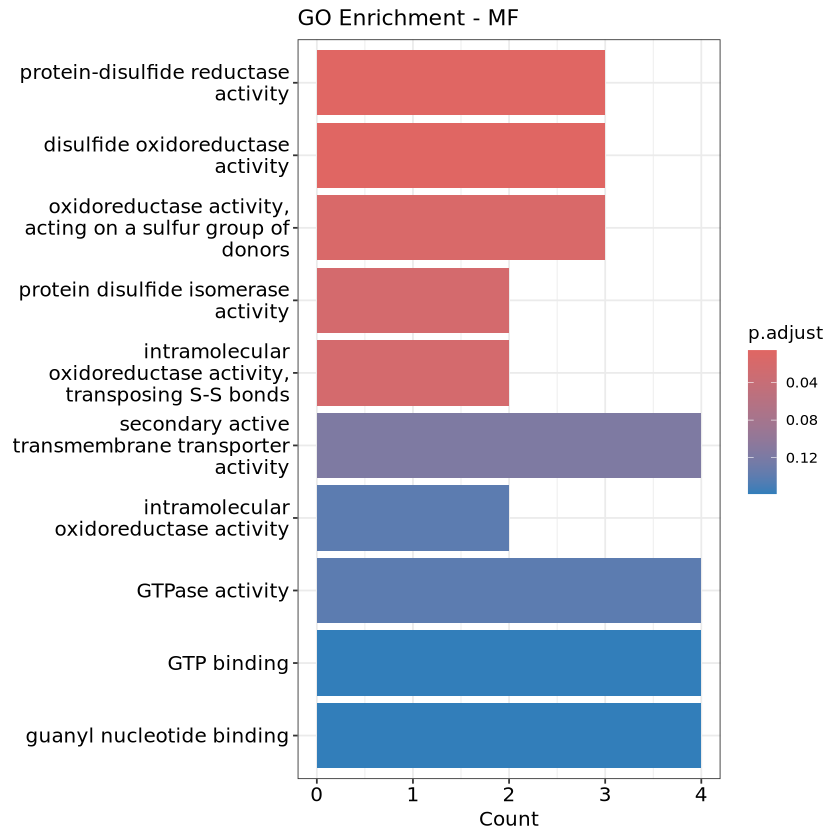

In [119]:
barplot(Aging4_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [120]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging4_sig_xqtl_MF.png', width = 6, height = 6)

### image_Aging5_xQTL list

In [121]:
Aging5_xQTL_ego <- enrichGO(
  gene          = Aging5_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [122]:
head(Aging5_xQTL_ego, n=5)

ID         Description                                       
GO:0051893 GO:0051893 regulation of focal adhesion assembly             
GO:0090109 GO:0090109 regulation of cell-substrate junction assembly    
GO:0150116 GO:0150116 regulation of cell-substrate junction organization
GO:0006607 GO:0006607 NLS-bearing protein import into nucleus           
GO:2000427 GO:2000427 positive regulation of apoptotic cell clearance   
           GeneRatio BgRatio  pvalue      p.adjust  qvalue   
GO:0051893 3/62      70/21261 0.001124767 0.2999005 0.2771278
GO:0090109 3/62      70/21261 0.001124767 0.2999005 0.2771278
GO:0150116 3/62      75/21261 0.001373189 0.2999005 0.2771278
GO:0006607 2/62      21/21261 0.001695437 0.2999005 0.2771278
GO:2000427 2/62      21/21261 0.001695437 0.2999005 0.2771278
           geneID                                          Count
GO:0051893 ENSG00000035403/ENSG00000169756/ENSG00000044524 3    
GO:0090109 ENSG00000035403/ENSG00000169756/ENSG00000044524 3    
GO:0150116 ENSG00000035403/ENSG00000169756/ENSG00000044524 3    
GO:0006607 ENSG00000196862/ENSG00000153201                 2    
GO:2000427 ENSG00000244731/ENSG00000224389                 2

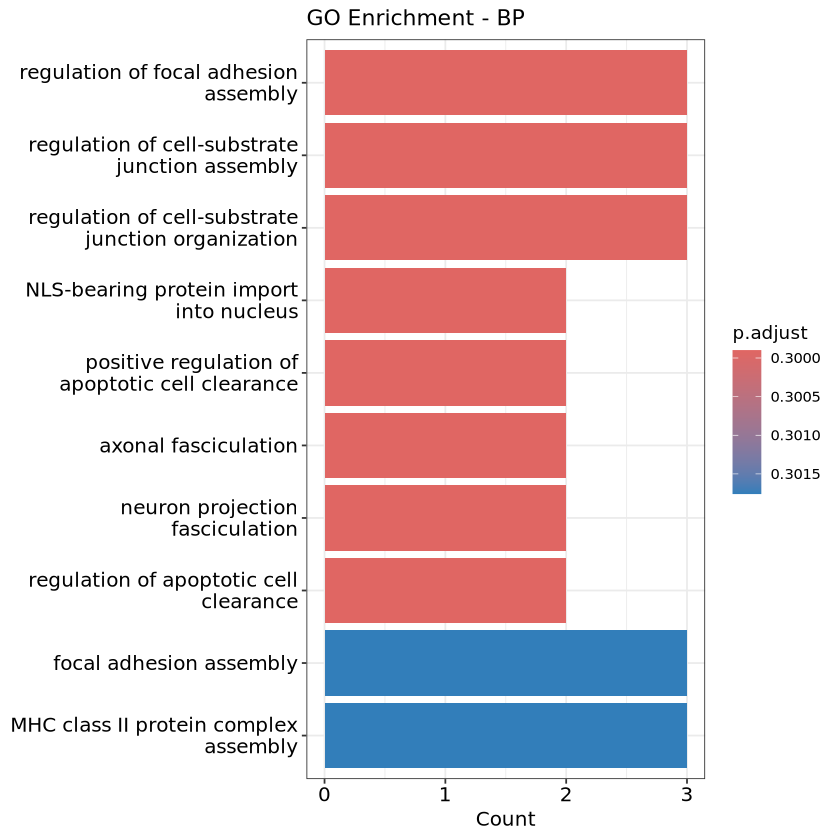

In [123]:
barplot(Aging5_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [124]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging5_sig_xqtl_BP.png', width = 6, height = 6)

In [125]:
Aging5_xQTL_ego_cc <- enrichGO(
  gene          = Aging5_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [126]:
head(Aging5_xQTL_ego_cc, n=5)

ID         Description                            GeneRatio
GO:0042613 GO:0042613 MHC class II protein complex           3/68     
GO:0005643 GO:0005643 nuclear pore                           3/68     
GO:0031902 GO:0031902 late endosome membrane                 4/68     
GO:0042611 GO:0042611 MHC protein complex                    3/68     
GO:0071014 GO:0071014 post-mRNA release spliceosomal complex 1/68     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0042613 98/22568  0.003243860 0.2789906 0.2509243
GO:0005643 101/22568 0.003531527 0.2789906 0.2509243
GO:0031902 268/22568 0.008739032 0.2984423 0.2684191
GO:0042611 142/22568 0.009070927 0.2984423 0.2684191
GO:0071014 10/22568  0.029731724 0.2984423 0.2684191
           geneID                                                         
GO:0042613 ENSG00000196735/ENSG00000242574/ENSG00000204257                
GO:0005643 ENSG00000196862/ENSG00000153201/ENSG00000132182                
GO:0031902 ENSG00000159210/ENSG00000196735/ENSG00000242574/ENSG00000204257
GO:0042611 ENSG00000196735/ENSG00000242574/ENSG00000204257                
GO:0071014 ENSG00000160799                                                
           Count
GO:0042613 3    
GO:0005643 3    
GO:0031902 4    
GO:0042611 3    
GO:0071014 1

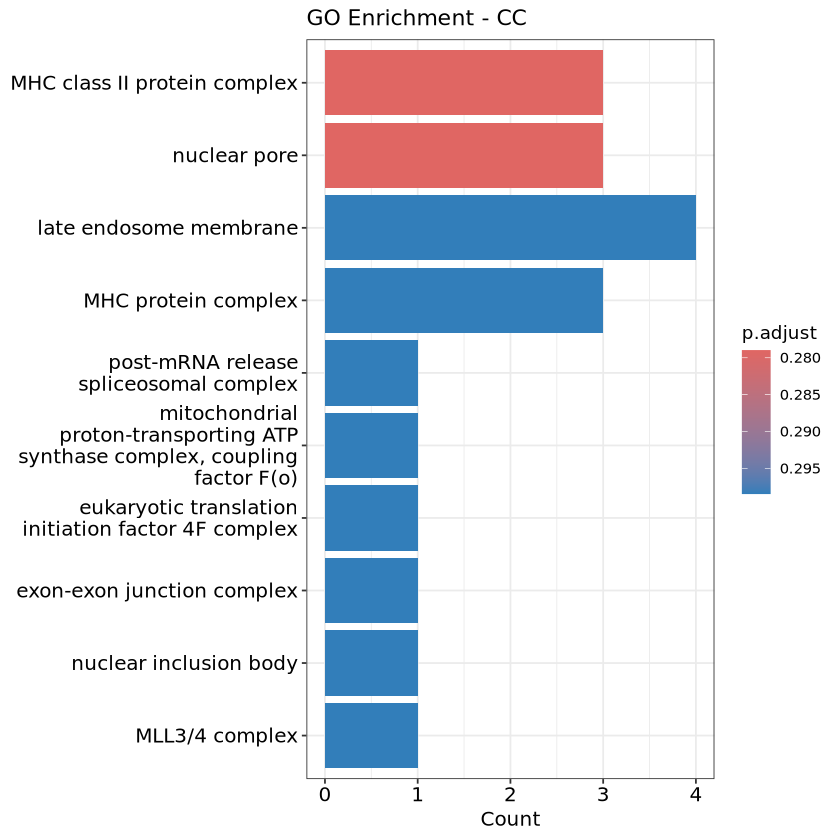

In [127]:
barplot(Aging5_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [128]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging5_sig_xqtl_CC.png', width = 6, height = 6)

In [129]:
Aging5_xQTL_ego_mf <- enrichGO(
  gene          = Aging5_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [130]:
head(Aging5_xQTL_ego_mf, n=5)

ID         Description                                    GeneRatio
GO:0023026 GO:0023026 MHC class II protein complex binding           3/68     
GO:0001848 GO:0001848 complement binding                             2/68     
GO:0023023 GO:0023023 MHC protein complex binding                    3/68     
GO:0004879 GO:0004879 nuclear receptor activity                      2/68     
GO:0098531 GO:0098531 ligand-activated transcription factor activity 2/68     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0023026 109/21059 0.005295754 0.2508857 0.2143027
GO:0001848 41/21059  0.007767251 0.2508857 0.2143027
GO:0023023 131/21059 0.008783529 0.2508857 0.2143027
GO:0004879 57/21059  0.014625366 0.2508857 0.2143027
GO:0098531 57/21059  0.014625366 0.2508857 0.2143027
           geneID                                          Count
GO:0023026 ENSG00000196735/ENSG00000242574/ENSG00000204257 3    
GO:0001848 ENSG00000244731/ENSG00000224389                 2    
GO:0023023 ENSG00000196735/ENSG00000242574/ENSG00000204257 3    
GO:0004879 ENSG00000177463/ENSG00000077092                 2    
GO:0098531 ENSG00000177463/ENSG00000077092                 2

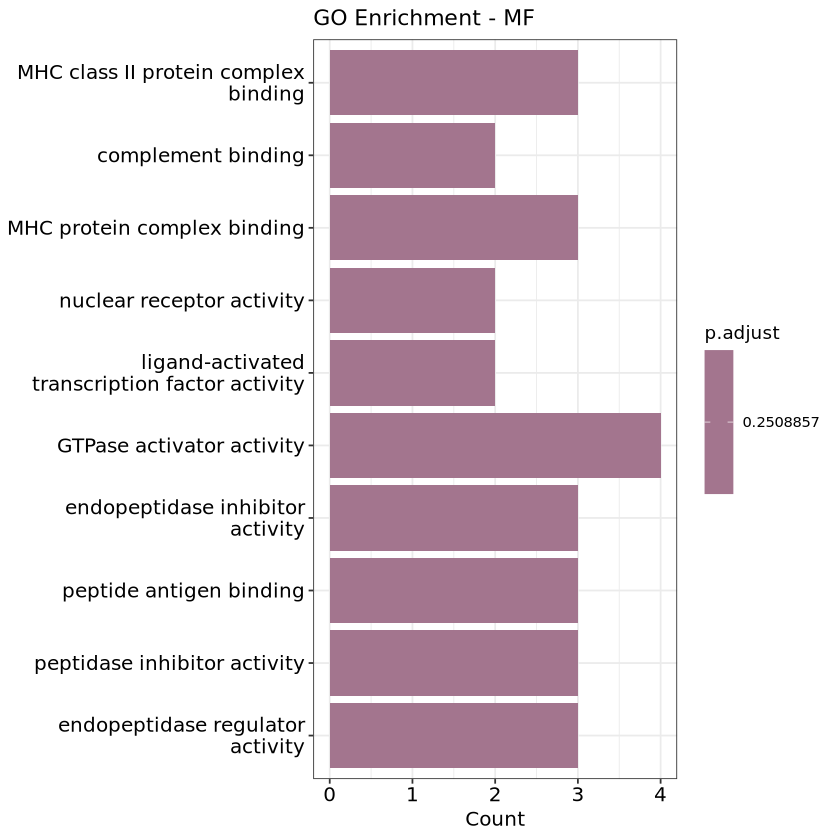

In [131]:
barplot(Aging5_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [132]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging5_sig_xqtl_MF.png', width = 6, height = 6)

#### KEGG

**AD2_Agig2**

In [133]:
entrez_ids <- bitr(AD2_Aging2_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [134]:
entrez_ids |> filter(ENTREZID %in% c("9776","5595", "9110", "598"))

ENSEMBL         ENTREZID
1 ENSG00000175224 9776    
2 ENSG00000102882 5595    
3 ENSG00000108389 9110    
4 ENSG00000171552 598

In [135]:
interest_kegg_list = entrez_ids |> filter(ENTREZID %in% c("9776","5595", "9110", "598")) |> pull(ENSEMBL)
combined_image_sig_xqtl |> filter(gene_id %in% interest_kegg_list)

#chr  start    end      gene_id         strand gene_name outcomes    
1 chr11 46617526 46674817 ENSG00000175224 +      ATG13     image_AD2   
2 chr16 30114104 30123505 ENSG00000102882 -      MAPK3     image_Aging2
3 chr16 30114104 30123505 ENSG00000102882 -      MAPK3     image_Aging3
4 chr17 58489528 58517904 ENSG00000108389 -      MTMR4     image_Aging2
5 chr20 31664451 31723988 ENSG00000171552 -      BCL2L1    image_Aging1
6 chr20 31664451 31723988 ENSG00000171552 -      BCL2L1    image_Aging2
  resource_in_FunGen_xQTL data_resources
1 ColocBoost              FunGen_xQTL   
2 ColocBoost              FunGen_xQTL   
3 ColocBoost              FunGen_xQTL   
4 ColocBoost              FunGen_xQTL   
5 ColocBoost,finemapping  FunGen_xQTL   
6 ColocBoost,finemapping  FunGen_xQTL

In [136]:
kegg_enrich %>% head(n=4)

category           subcategory                     ID      
hsa04140 Cellular Processes Transport and catabolism        hsa04140
hsa05212 Human Diseases     Cancer: specific types          hsa05212
hsa05220 Human Diseases     Cancer: specific types          hsa05220
hsa04520 Cellular Processes Cellular community - eukaryotes hsa04520
         Description              GeneRatio BgRatio  pvalue      p.adjust  
hsa04140 Autophagy - animal       4/26      169/9434 0.001091953 0.06570900
hsa05212 Pancreatic cancer        3/26      77/9434  0.001187512 0.06570900
hsa05220 Chronic myeloid leukemia 3/26      77/9434  0.001187512 0.06570900
hsa04520 Adherens junction        3/26      93/9434  0.002046001 0.08490903
         qvalue     geneID             Count
hsa04140 0.05416722 9776/5595/9110/598 4    
hsa05212 0.05416722 5595/598/10912     3    
hsa05220 0.05416722 5595/598/10912     3    
hsa04520 0.06999476 1500/5595/83605    3

In [137]:
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

category                             subcategory                    
hsa05417 Human Diseases                       Cardiovascular disease         
hsa00565 Metabolism                           Lipid metabolism               
hsa00561 Metabolism                           Lipid metabolism               
hsa00564 Metabolism                           Lipid metabolism               
hsa04071 Environmental Information Processing Signal transduction            
hsa05010 Human Diseases                       Neurodegenerative disease      
hsa04932 Human Diseases                       Endocrine and metabolic disease
         ID       Description                       GeneRatio BgRatio 
hsa05417 hsa05417 Lipid and atherosclerosis         2/26      216/9434
hsa00565 hsa00565 Ether lipid metabolism            1/26      50/9434 
hsa00561 hsa00561 Glycerolipid metabolism           1/26      65/9434 
hsa00564 hsa00564 Glycerophospholipid metabolism    1/26      103/9434
hsa04071 hsa04071 Sphingolipid signaling pathway    1/26      122/9434
hsa05010 hsa05010 Alzheimer disease                 2/26      391/9434
hsa04932 hsa04932 Non-alcoholic fatty liver disease 1/26      157/9434
         pvalue    p.adjust  qvalue    geneID    Count
hsa05417 0.1185882 0.3075880 0.2535602 5595/598  2    
hsa00565 0.1292060 0.3249726 0.2678912 79153     1    
hsa00561 0.1647287 0.3598022 0.2966029 8525      1    
hsa00564 0.2485937 0.3817058 0.3146592 8525      1    
hsa04071 0.2874291 0.3817058 0.3146592 5595      1    
hsa05010 0.2933344 0.3860550 0.3182444 9776/5595 2    
hsa04932 0.3539738 0.4058428 0.3345565 10062     1

category       subcategory               ID       Description      
hsa05010 Human Diseases Neurodegenerative disease hsa05010 Alzheimer disease
         GeneRatio BgRatio  pvalue    p.adjust qvalue    geneID    Count
hsa05010 2/26      391/9434 0.2933344 0.386055 0.3182444 9776/5595 2

In [138]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist))

ENSEMBL         ENTREZID
1 ENSG00000175224 9776    
2 ENSG00000102882 5595

In [139]:
kegg_enrich %>% as.data.frame %>% filter(geneID == 9776)

category           subcategory               ID      
hsa04136 Cellular Processes Transport and catabolism  hsa04136
hsa04211 Organismal Systems Aging                     hsa04211
hsa05017 Human Diseases     Neurodegenerative disease hsa05017
hsa05016 Human Diseases     Neurodegenerative disease hsa05016
         Description                  GeneRatio BgRatio  pvalue     p.adjust 
hsa04136 Autophagy - other            1/26      32/9434  0.08465938 0.2735016
hsa04211 Longevity regulating pathway 1/26      90/9434  0.22085814 0.3817058
hsa05017 Spinocerebellar ataxia       1/26      144/9434 0.32998649 0.3998376
hsa05016 Huntington disease           1/26      311/9434 0.58219281 0.5857212
         qvalue    geneID Count
hsa04136 0.2254610 9776   1    
hsa04211 0.3146592 9776   1    
hsa05017 0.3296062 9776   1    
hsa05016 0.4828393 9776   1

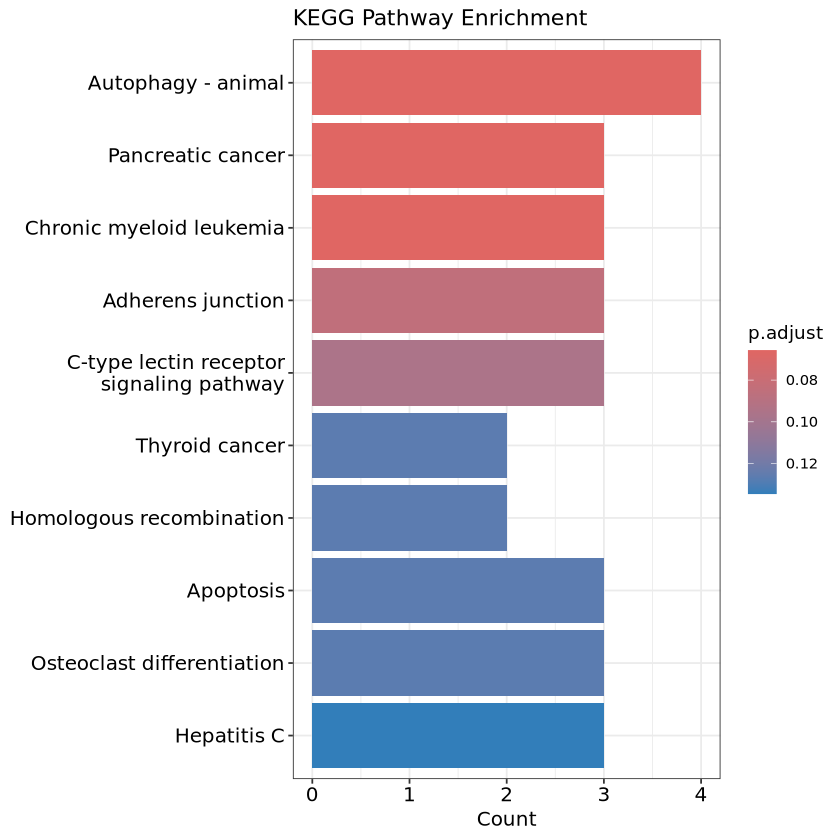

In [140]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [141]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_Aging2_xqtl_KEGG.png', width = 6, height = 6)

**AD2_Agig2**

In [142]:
entrez_ids <- bitr(AD2_Aging2_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [143]:
entrez_ids |> filter(ENTREZID %in% c("9776","5595", "9110", "598"))

ENSEMBL         ENTREZID
1 ENSG00000175224 9776    
2 ENSG00000102882 5595    
3 ENSG00000108389 9110    
4 ENSG00000171552 598

In [144]:
interest_kegg_list = entrez_ids |> filter(ENTREZID %in% c("9776","5595", "9110", "598")) |> pull(ENSEMBL)
combined_image_sig_xqtl |> filter(gene_id %in% interest_kegg_list)

#chr  start    end      gene_id         strand gene_name outcomes    
1 chr11 46617526 46674817 ENSG00000175224 +      ATG13     image_AD2   
2 chr16 30114104 30123505 ENSG00000102882 -      MAPK3     image_Aging2
3 chr16 30114104 30123505 ENSG00000102882 -      MAPK3     image_Aging3
4 chr17 58489528 58517904 ENSG00000108389 -      MTMR4     image_Aging2
5 chr20 31664451 31723988 ENSG00000171552 -      BCL2L1    image_Aging1
6 chr20 31664451 31723988 ENSG00000171552 -      BCL2L1    image_Aging2
  resource_in_FunGen_xQTL data_resources
1 ColocBoost              FunGen_xQTL   
2 ColocBoost              FunGen_xQTL   
3 ColocBoost              FunGen_xQTL   
4 ColocBoost              FunGen_xQTL   
5 ColocBoost,finemapping  FunGen_xQTL   
6 ColocBoost,finemapping  FunGen_xQTL

In [145]:
kegg_enrich %>% head(n=4)

category           subcategory                     ID      
hsa04140 Cellular Processes Transport and catabolism        hsa04140
hsa05212 Human Diseases     Cancer: specific types          hsa05212
hsa05220 Human Diseases     Cancer: specific types          hsa05220
hsa04520 Cellular Processes Cellular community - eukaryotes hsa04520
         Description              GeneRatio BgRatio  pvalue      p.adjust  
hsa04140 Autophagy - animal       4/26      169/9434 0.001091953 0.06570900
hsa05212 Pancreatic cancer        3/26      77/9434  0.001187512 0.06570900
hsa05220 Chronic myeloid leukemia 3/26      77/9434  0.001187512 0.06570900
hsa04520 Adherens junction        3/26      93/9434  0.002046001 0.08490903
         qvalue     geneID             Count
hsa04140 0.05416722 9776/5595/9110/598 4    
hsa05212 0.05416722 5595/598/10912     3    
hsa05220 0.05416722 5595/598/10912     3    
hsa04520 0.06999476 1500/5595/83605    3

In [146]:
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

category                             subcategory                    
hsa05417 Human Diseases                       Cardiovascular disease         
hsa00565 Metabolism                           Lipid metabolism               
hsa00561 Metabolism                           Lipid metabolism               
hsa00564 Metabolism                           Lipid metabolism               
hsa04071 Environmental Information Processing Signal transduction            
hsa05010 Human Diseases                       Neurodegenerative disease      
hsa04932 Human Diseases                       Endocrine and metabolic disease
         ID       Description                       GeneRatio BgRatio 
hsa05417 hsa05417 Lipid and atherosclerosis         2/26      216/9434
hsa00565 hsa00565 Ether lipid metabolism            1/26      50/9434 
hsa00561 hsa00561 Glycerolipid metabolism           1/26      65/9434 
hsa00564 hsa00564 Glycerophospholipid metabolism    1/26      103/9434
hsa04071 hsa04071 Sphingolipid signaling pathway    1/26      122/9434
hsa05010 hsa05010 Alzheimer disease                 2/26      391/9434
hsa04932 hsa04932 Non-alcoholic fatty liver disease 1/26      157/9434
         pvalue    p.adjust  qvalue    geneID    Count
hsa05417 0.1185882 0.3075880 0.2535602 5595/598  2    
hsa00565 0.1292060 0.3249726 0.2678912 79153     1    
hsa00561 0.1647287 0.3598022 0.2966029 8525      1    
hsa00564 0.2485937 0.3817058 0.3146592 8525      1    
hsa04071 0.2874291 0.3817058 0.3146592 5595      1    
hsa05010 0.2933344 0.3860550 0.3182444 9776/5595 2    
hsa04932 0.3539738 0.4058428 0.3345565 10062     1

category       subcategory               ID       Description      
hsa05010 Human Diseases Neurodegenerative disease hsa05010 Alzheimer disease
         GeneRatio BgRatio  pvalue    p.adjust qvalue    geneID    Count
hsa05010 2/26      391/9434 0.2933344 0.386055 0.3182444 9776/5595 2

In [147]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist))

ENSEMBL         ENTREZID
1 ENSG00000175224 9776    
2 ENSG00000102882 5595

In [148]:
kegg_enrich %>% as.data.frame %>% filter(geneID == 9776)

category           subcategory               ID      
hsa04136 Cellular Processes Transport and catabolism  hsa04136
hsa04211 Organismal Systems Aging                     hsa04211
hsa05017 Human Diseases     Neurodegenerative disease hsa05017
hsa05016 Human Diseases     Neurodegenerative disease hsa05016
         Description                  GeneRatio BgRatio  pvalue     p.adjust 
hsa04136 Autophagy - other            1/26      32/9434  0.08465938 0.2735016
hsa04211 Longevity regulating pathway 1/26      90/9434  0.22085814 0.3817058
hsa05017 Spinocerebellar ataxia       1/26      144/9434 0.32998649 0.3998376
hsa05016 Huntington disease           1/26      311/9434 0.58219281 0.5857212
         qvalue    geneID Count
hsa04136 0.2254610 9776   1    
hsa04211 0.3146592 9776   1    
hsa05017 0.3296062 9776   1    
hsa05016 0.4828393 9776   1

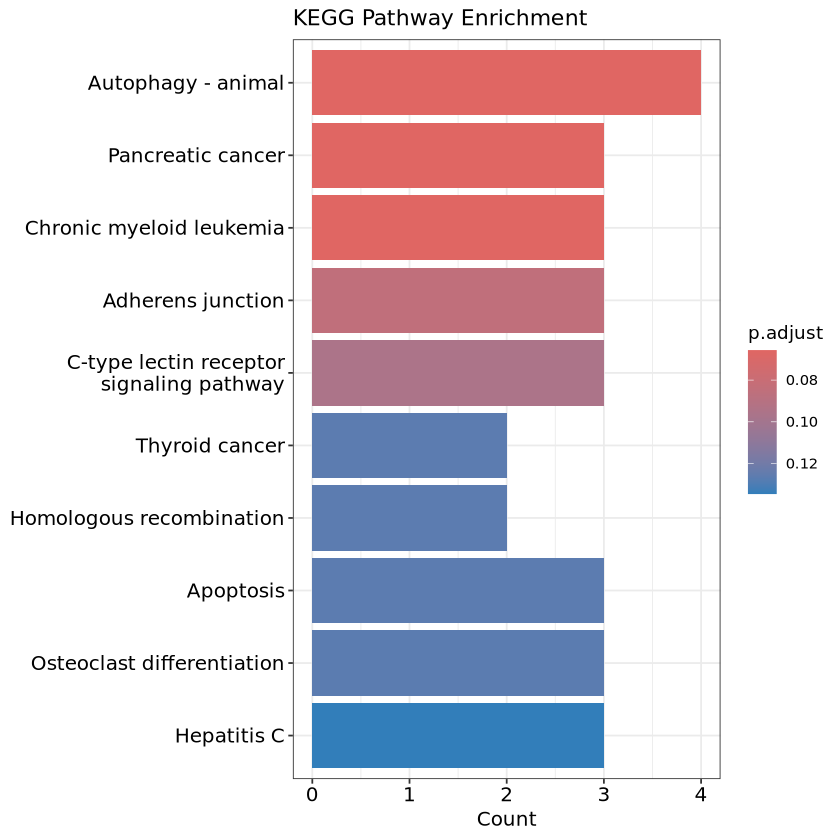

In [149]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [150]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_Aging2_xqtl_KEGG.png', width = 6, height = 6)

**AD1**

In [151]:
entrez_ids <- bitr(AD1_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [152]:
kegg_enrich %>% head(n=6)

category                       subcategory                         
hsa04270 Organismal Systems             Circulatory system                  
hsa04814 Cellular Processes             Cell motility                       
hsa00053 Metabolism                     Carbohydrate metabolism             
hsa04130 Genetic Information Processing Folding, sorting and degradation    
hsa00040 Metabolism                     Carbohydrate metabolism             
hsa00860 Metabolism                     Metabolism of cofactors and vitamins
         ID       Description                               GeneRatio BgRatio 
hsa04270 hsa04270 Vascular smooth muscle contraction        2/17      134/9434
hsa04814 hsa04814 Motor proteins                            2/17      197/9434
hsa00053 hsa00053 Ascorbate and aldarate metabolism         1/17      30/9434 
hsa04130 hsa04130 SNARE interactions in vesicular transport 1/17      33/9434 
hsa00040 hsa00040 Pentose and glucuronate interconversions  1/17      36/9434 
hsa00860 hsa00860 Porphyrin metabolism                      1/17      46/9434 
         pvalue     p.adjust  qvalue    geneID      Count
hsa04270 0.02368981 0.3775061 0.3775061 135/2768    2    
hsa04814 0.04803761 0.3775061 0.3775061 10121/63971 2    
hsa00053 0.05274975 0.3775061 0.3775061 7364        1    
hsa04130 0.05787816 0.3775061 0.3775061 9342        1    
hsa00040 0.06298044 0.3775061 0.3775061 7364        1    
hsa00860 0.07980082 0.3775061 0.3775061 7364        1

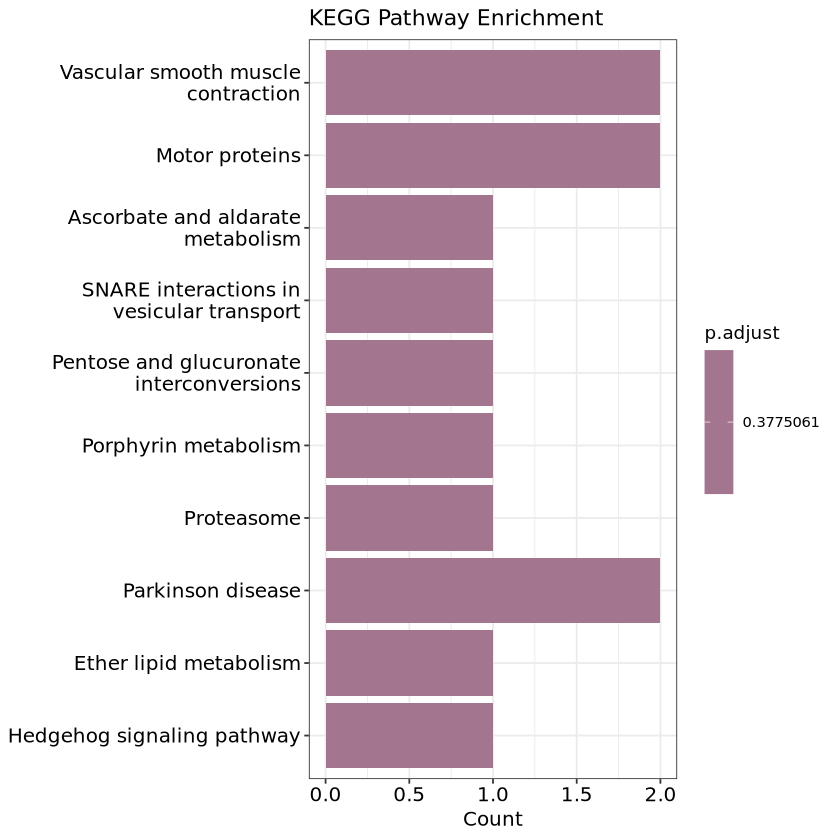

In [153]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [154]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD1_xqtl_KEGG.png', width = 6, height = 6)

**AD2**

In [155]:
entrez_ids <- bitr(AD2_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [156]:
kegg_enrich %>% head(n=6)

category                             subcategory                    
hsa04520 Cellular Processes                   Cellular community - eukaryotes
hsa04625 Organismal Systems                   Immune system                  
hsa04380 Organismal Systems                   Development and regeneration   
hsa05160 Human Diseases                       Infectious disease: viral      
hsa04630 Environmental Information Processing Signal transduction            
hsa00020 Metabolism                           Carbohydrate metabolism        
         ID       Description                              GeneRatio BgRatio 
hsa04520 hsa04520 Adherens junction                        2/16      93/9434 
hsa04625 hsa04625 C-type lectin receptor signaling pathway 2/16      105/9434
hsa04380 hsa04380 Osteoclast differentiation               2/16      143/9434
hsa05160 hsa05160 Hepatitis C                              2/16      159/9434
hsa04630 hsa04630 JAK-STAT signaling pathway               2/16      168/9434
hsa00020 hsa00020 Citrate cycle (TCA cycle)                1/16      30/9434 
         pvalue     p.adjust  qvalue    geneID     Count
hsa04520 0.01054534 0.3577067 0.3382418 1500/83605 2    
hsa04625 0.01330076 0.3577067 0.3382418 51561/6773 2    
hsa04380 0.02382510 0.3577067 0.3382418 6688/6773  2    
hsa05160 0.02901583 0.3577067 0.3382418 10062/6773 2    
hsa04630 0.03211940 0.3577067 0.3382418 51561/6773 2    
hsa00020 0.04972275 0.3577067 0.3382418 1431       1

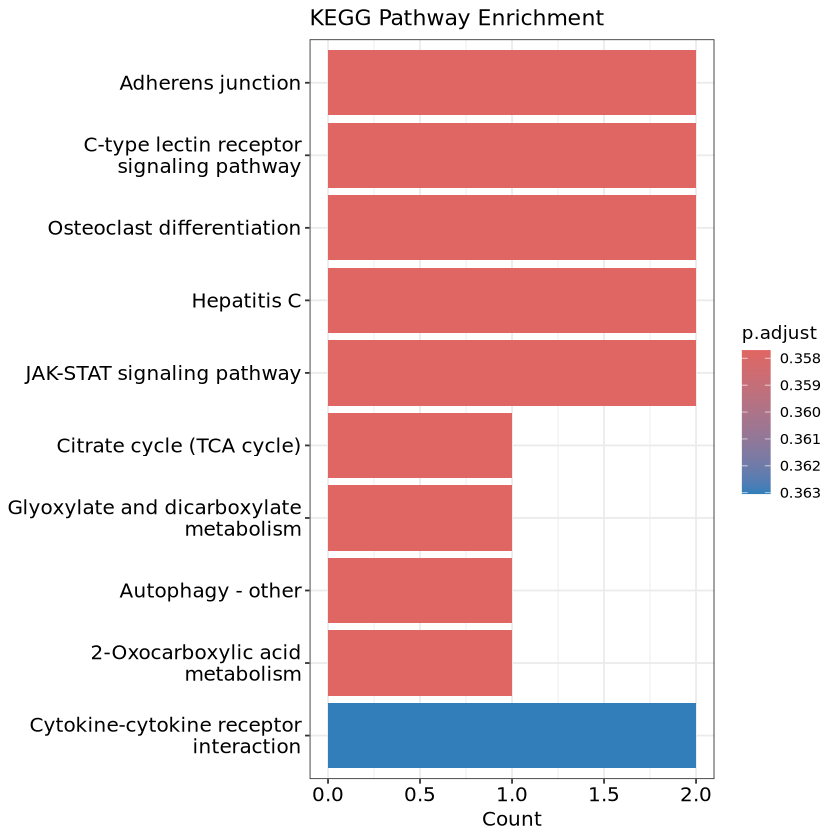

In [157]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [158]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_AD2_xqtl_KEGG.png', width = 6, height = 6)

**Aging1**

In [159]:
entrez_ids <- bitr(Aging1_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging1_xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.59% of input gene IDs are fail to map..."


In [160]:
kegg_enrich %>% head(n=6)

category           subcategory                              ID      
hsa05168 Human Diseases     Infectious disease: viral                hsa05168
hsa00620 Metabolism         Carbohydrate metabolism                  hsa00620
hsa05204 Human Diseases     Cancer: overview                         hsa05204
hsa01200 Metabolism         Global and overview maps                 hsa01200
hsa04380 Organismal Systems Development and regeneration             hsa04380
hsa00900 Metabolism         Metabolism of terpenoids and polyketides hsa00900
         Description                           GeneRatio BgRatio  pvalue      
hsa05168 Herpes simplex virus 1 infection      5/24      182/9434 7.980764e-05
hsa00620 Pyruvate metabolism                   2/24      47/9434  6.252939e-03
hsa05204 Chemical carcinogenesis - DNA adducts 2/24      71/9434  1.385075e-02
hsa01200 Carbon metabolism                     2/24      117/9434 3.523836e-02
hsa04380 Osteoclast differentiation            2/24      143/9434 5.066405e-02
hsa00900 Terpenoid backbone biosynthesis       1/24      23/9434  5.696778e-02
         p.adjust    qvalue      geneID                    Count
hsa05168 0.007422111 0.007422111 8892/598/3105/29990/29992 5    
hsa00620 0.290761646 0.290761646 97/39                     2    
hsa05204 0.383155850 0.383155850 6799/6817                 2    
hsa01200 0.383155850 0.383155850 387712/39                 2    
hsa04380 0.383155850 0.383155850 487/4982                  2    
hsa00900 0.383155850 0.383155850 39                        1

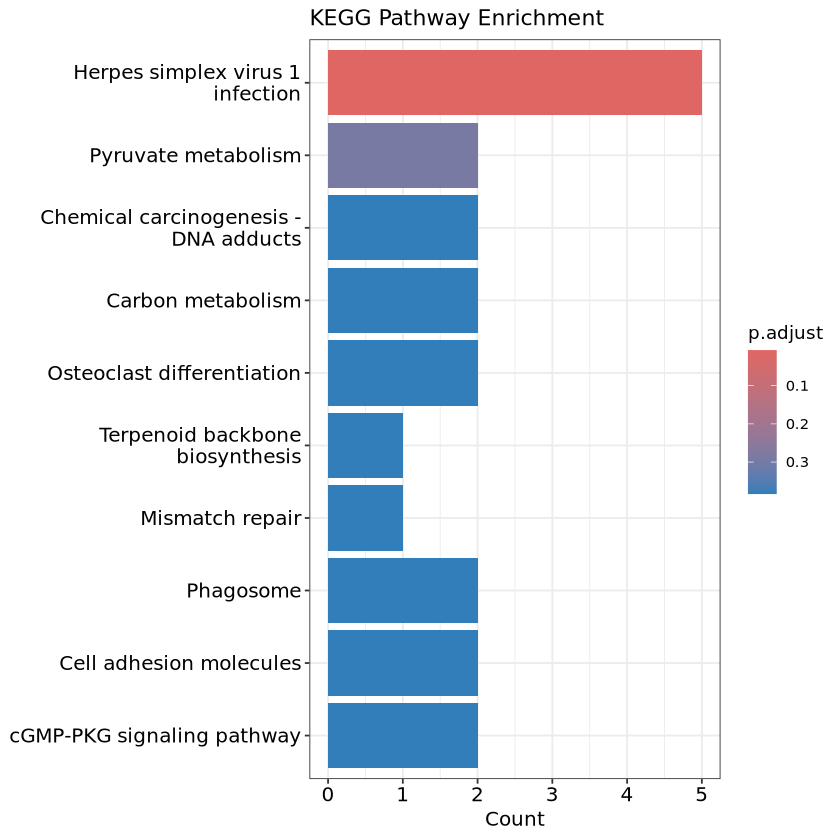

In [161]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [162]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging1_xqtl_KEGG.png', width = 6, height = 6)

**Aging2**

In [163]:
entrez_ids <- bitr(Aging2_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [164]:
kegg_enrich %>% head(n=6)

category                       subcategory              ID      
hsa05212 Human Diseases                 Cancer: specific types   hsa05212
hsa05220 Human Diseases                 Cancer: specific types   hsa05220
hsa04210 Cellular Processes             Cell growth and death    hsa04210
hsa05216 Human Diseases                 Cancer: specific types   hsa05216
hsa03440 Genetic Information Processing Replication and repair   hsa03440
hsa04140 Cellular Processes             Transport and catabolism hsa04140
         Description              GeneRatio BgRatio  pvalue       p.adjust  
hsa05212 Pancreatic cancer        3/13      77/9434  0.0001409890 0.01008071
hsa05220 Chronic myeloid leukemia 3/13      77/9434  0.0001409890 0.01008071
hsa04210 Apoptosis                3/13      137/9434 0.0007702221 0.02940707
hsa05216 Thyroid cancer           2/13      37/9434  0.0011361457 0.02940707
hsa03440 Homologous recombination 2/13      41/9434  0.0013945156 0.02940707
hsa04140 Autophagy - animal       3/13      169/9434 0.0014152349 0.02940707
         qvalue     geneID         Count
hsa05212 0.00786570 5595/598/10912 3    
hsa05220 0.00786570 5595/598/10912 3    
hsa04210 0.02294552 5595/598/10912 3    
hsa05216 0.02294552 5595/10912     2    
hsa03440 0.02294552 5889/6119      2    
hsa04140 0.02294552 5595/9110/598  3

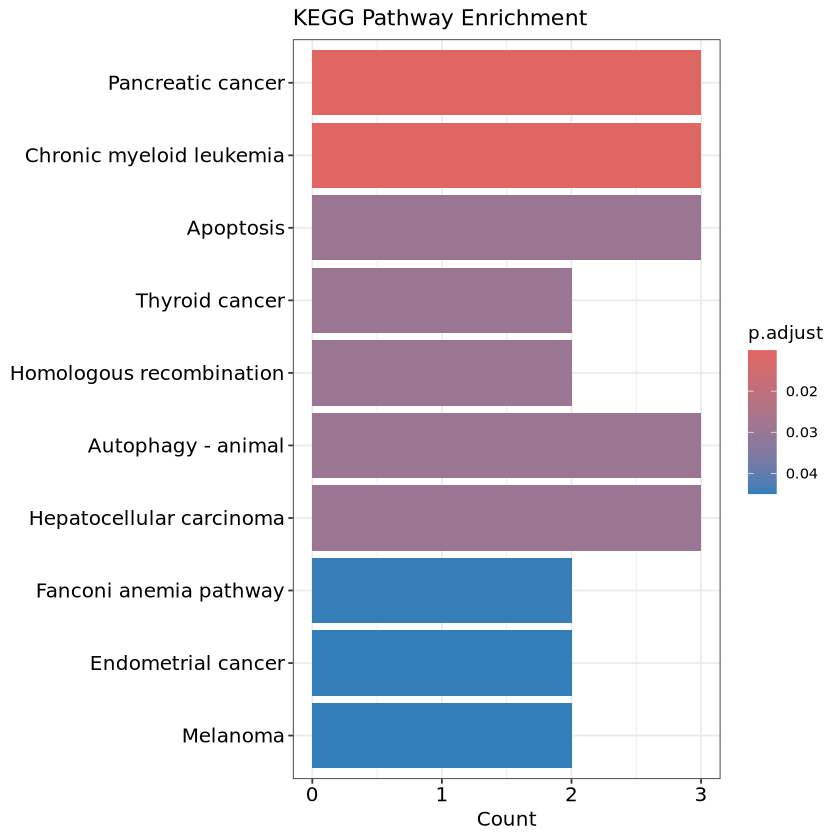

In [165]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [166]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging2_xqtl_KEGG.png', width = 6, height = 6)

**Aging3**

In [167]:
entrez_ids <- bitr(Aging3_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging3_xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"2.27% of input gene IDs are fail to map..."


In [168]:
kegg_enrich %>% head(n=6)

category                             subcategory                    
hsa04140 Cellular Processes                   Transport and catabolism       
hsa04932 Human Diseases                       Endocrine and metabolic disease
hsa04930 Human Diseases                       Endocrine and metabolic disease
hsa04370 Environmental Information Processing Signal transduction            
hsa04730 Organismal Systems                   Nervous system                 
hsa05010 Human Diseases                       Neurodegenerative disease      
         ID       Description                       GeneRatio BgRatio 
hsa04140 hsa04140 Autophagy - animal                4/19      169/9434
hsa04932 hsa04932 Non-alcoholic fatty liver disease 3/19      157/9434
hsa04930 hsa04930 Type II diabetes mellitus         2/19      47/9434 
hsa04370 hsa04370 VEGF signaling pathway            2/19      60/9434 
hsa04730 hsa04730 Long-term depression              2/19      60/9434 
hsa05010 hsa05010 Alzheimer disease                 4/19      391/9434
         pvalue       p.adjust   qvalue     geneID               Count
hsa04140 0.0003121738 0.05150868 0.04436154 8660/5595/9842/84557 4    
hsa04932 0.0036024037 0.17374720 0.14963874 998/8660/83737       3    
hsa04930 0.0039359212 0.17374720 0.14963874 8660/5595            2    
hsa04370 0.0063449941 0.17374720 0.14963874 998/5595             2    
hsa04730 0.0063449941 0.17374720 0.14963874 5595/1394            2    
hsa05010 0.0068637081 0.17374720 0.14963874 8660/5684/5595/4137  4

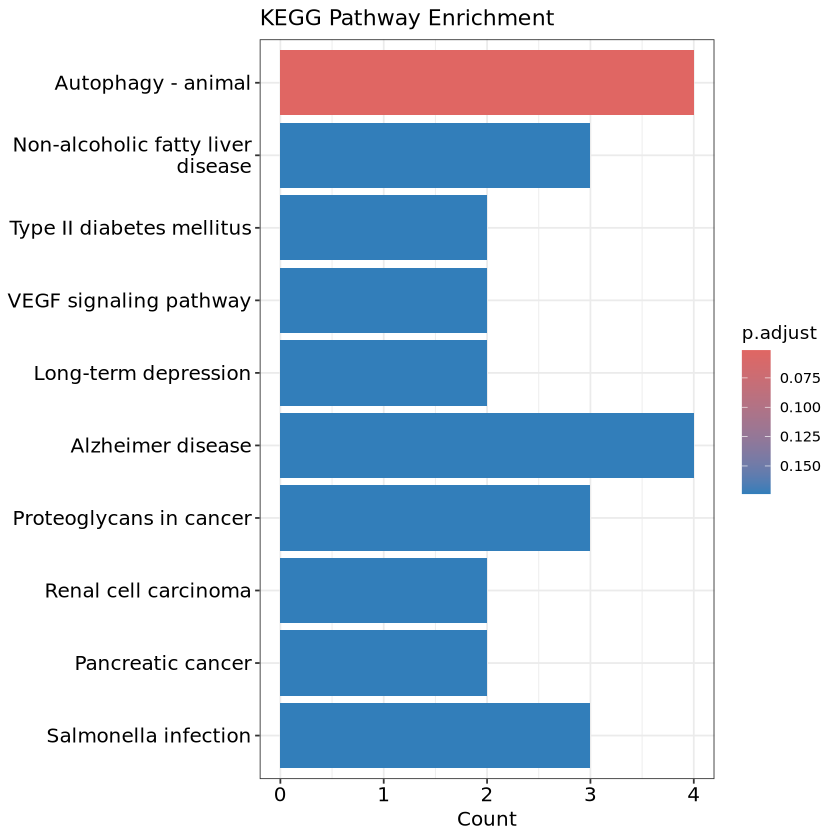

In [169]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [170]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging3_xqtl_KEGG.png', width = 6, height = 6)

**Aging4**

In [171]:
entrez_ids <- bitr(Aging4_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [172]:
kegg_enrich %>% head(n=6)

category                             subcategory                     
hsa04625 Organismal Systems                   Immune system                   
hsa04142 Cellular Processes                   Transport and catabolism        
hsa04390 Environmental Information Processing Signal transduction             
hsa04630 Environmental Information Processing Signal transduction             
hsa04141 Genetic Information Processing       Folding, sorting and degradation
hsa05164 Human Diseases                       Infectious disease: viral       
         ID       Description                                 GeneRatio
hsa04625 hsa04625 C-type lectin receptor signaling pathway    2/22     
hsa04142 hsa04142 Lysosome                                    2/22     
hsa04390 hsa04390 Hippo signaling pathway                     2/22     
hsa04630 hsa04630 JAK-STAT signaling pathway                  2/22     
hsa04141 hsa04141 Protein processing in endoplasmic reticulum 2/22     
hsa05164 hsa05164 Influenza A                                 2/22     
         BgRatio  pvalue     p.adjust  qvalue    geneID      Count
hsa04625 105/9434 0.02452085 0.4486177 0.4486177 51561/6773  2    
hsa04142 133/9434 0.03790914 0.4486177 0.4486177 1510/8546   2    
hsa04390 157/9434 0.05114680 0.4486177 0.4486177 6934/654    2    
hsa04630 168/9434 0.05770009 0.4486177 0.4486177 51561/6773  2    
hsa04141 171/9434 0.05953679 0.4486177 0.4486177 56605/81567 2    
hsa05164 173/9434 0.06077268 0.4486177 0.4486177 6773/3838   2

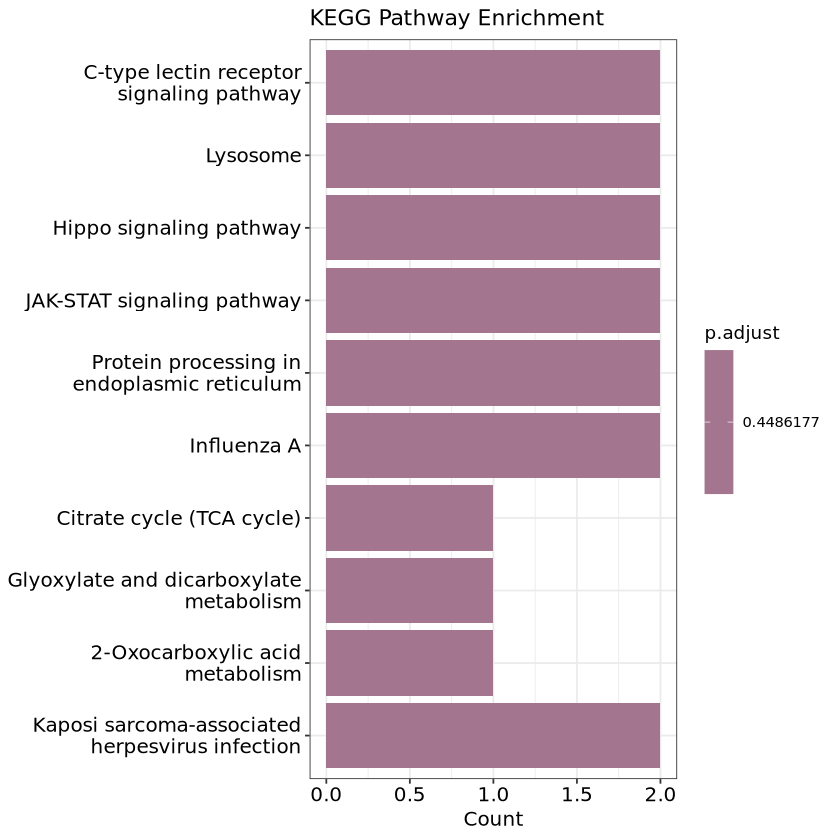

In [173]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [174]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging4_xqtl_KEGG.png', width = 6, height = 6)

**Aging5**

In [175]:
entrez_ids <- bitr(Aging5_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns



In [176]:
kegg_enrich %>% head(n=6)

category           subcategory                   ID      
hsa05150 Human Diseases     Infectious disease: bacterial hsa05150
hsa05322 Human Diseases     Immune disease                hsa05322
hsa05416 Human Diseases     Cardiovascular disease        hsa05416
hsa05310 Human Diseases     Immune disease                hsa05310
hsa04610 Organismal Systems Immune system                 hsa04610
hsa04658 Organismal Systems Immune system                 hsa04658
         Description                         GeneRatio BgRatio  pvalue      
hsa05150 Staphylococcus aureus infection     7/30      102/9434 2.329353e-08
hsa05322 Systemic lupus erythematosus        6/30      144/9434 5.002179e-06
hsa05416 Viral myocarditis                   4/30      70/9434  6.585227e-05
hsa05310 Asthma                              3/30      32/9434  1.352572e-04
hsa04610 Complement and coagulation cascades 4/30      88/9434  1.609554e-04
hsa04658 Th1 and Th2 cell differentiation    4/30      93/9434  1.993190e-04
         p.adjust     qvalue       geneID                               Count
hsa05150 2.655463e-06 1.937041e-06 728/720/110384692/721/3117/3109/3108 7    
hsa05322 2.851242e-04 2.079853e-04 720/110384692/721/3117/3109/3108     6    
hsa05416 2.502386e-03 1.825379e-03 8672/3117/3109/3108                  4    
hsa05310 3.669783e-03 2.676943e-03 3117/3109/3108                       3    
hsa04610 3.669783e-03 2.676943e-03 728/720/110384692/721                4    
hsa04658 3.787062e-03 2.762492e-03 5335/3117/3109/3108                  4

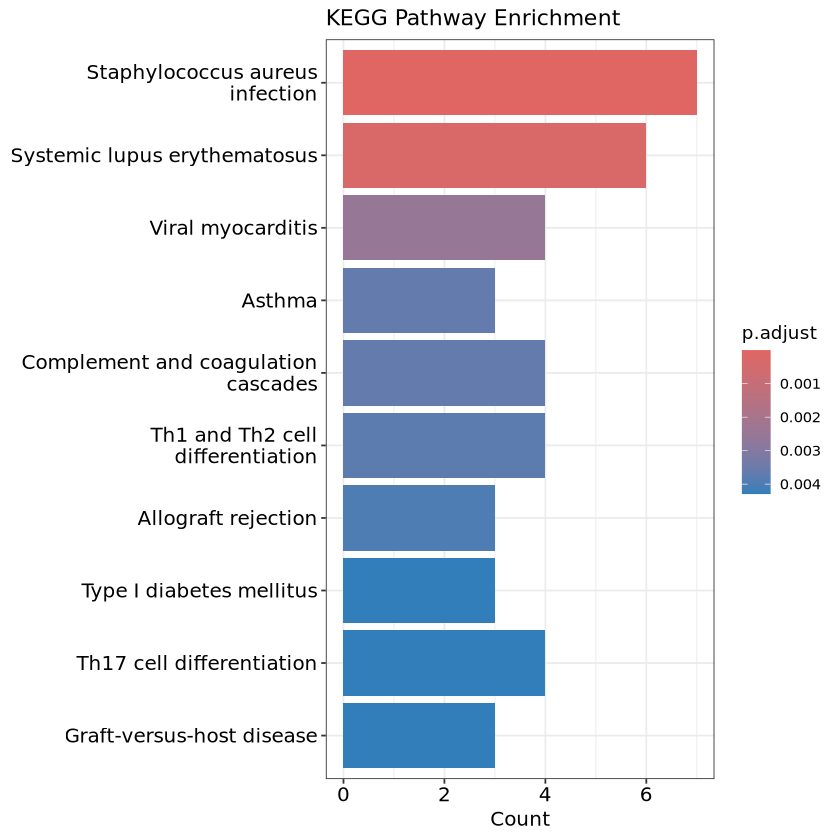

In [177]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [178]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/image_Aging5_xqtl_KEGG.png', width = 6, height = 6)

## PPI

### xQTL 

In [179]:
BiocManager::install("STRINGdb")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.26), R 4.3.3 (2024-02-29)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'STRINGdb'"
Old packages: 'AnnotationHub', 'BSgenome', 'BiocFileCache', 'Biostrings',
  'GOSemSim', 'GenomeInfoDb', 'GenomicAlignments', 'HDF5Array', 'MBSP',
  'MOFA2', 'RCurl', 'RSQLite', 'RcppArmadillo', 'Rfast', 'Rhdf5lib', 'Rhtslib',
  'S4Arrays', 'SparseArray', 'XML', 'basilisk', 'beachmat', 'caret', 'curl',
  'data.table', 'dqrng', 'gert', 'ggiraph', 'ggtree', 'glmnet', 'gower',
  'gwasrapidd', 'haven', 'httpuv', 'httr2', 'igraph', 'leidenbase', 'pbapply',
  'pgenlibr', 'promises', 'psichomics', 'reshape', 'restfulr', 'reticulate',
  'shadowtext', 'spatstat.explore', 'spatstat.geom', 'spatstat

In [180]:
# Load necessary libraries
library(STRINGdb)
library(dplyr)
library(igraph)

# Initialize STRINGdb (change species if needed, 9606 = Homo sapiens)
string_db <- STRINGdb$new(version="11.5", species=9606, score_threshold=400, input_directory="")

# Example gene list (use your own gene symbols or Entrez IDs)
genes <- combined_image_sig_xqtl$gene_name

# Map gene names to STRING IDs
mapped_genes <- string_db$map(data.frame(gene=genes), "gene", removeUnmappedRows = TRUE)
#mapped_genes
# Retrieve interaction network for the genes
ppi_network <- string_db$get_interactions(mapped_genes$STRING_id)



Attaching package: 'igraph'


The following object is masked from 'package:IRanges':

    union


The following object is masked from 'package:S4Vectors':

    union


The following objects are masked from 'package:BiocGenerics':

    normalize, path, union


The following object is masked from 'package:clusterProfiler':

    simplify


The following objects are masked from 'package:lubridate':

    %--%, union


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

    as_data_frame


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [181]:
ppi_network_unique <- ppi_network %>%
  mutate(pair = paste0(pmin(from, to), "_", pmax(from, to))) %>%
  distinct(pair, .keep_all = TRUE)

In [182]:
genes_with_ppi <- mapped_genes %>% filter(STRING_id %in% c(ppi_network$from, ppi_network$to))
genes_with_ppi %>% dim 
head(genes_with_ppi)

[1] 280   2

gene   STRING_id           
1 EIF4G3 9606.ENSP00000383274
2 HSPG2  9606.ENSP00000363827
3 CDC42  9606.ENSP00000383118
4 CD101  9606.ENSP00000358482
5 GLRX2  9606.ENSP00000356410
6 CDC73  9606.ENSP00000356405

In [183]:
genes_with_ppi |> filter(gene == "DOC2A")

gene  STRING_id           
1 DOC2A 9606.ENSP00000340017
2 DOC2A 9606.ENSP00000340017

In [184]:
combined_image_sig_xqtl %>% pull(resource_in_FunGen_xQTL) %>% table

.
            ColocBoost ColocBoost,finemapping            finemapping 
                   273                     60                      3 

In [185]:
combined_image_sig_xqtl %>% dim

[1] 336   9

In [186]:
head(combined_image_sig_xqtl)

#chr start     end       gene_id         strand gene_name outcomes    
1 chr1  20806291  21176887 ENSG00000075151 -      EIF4G3    image_Aging5
2 chr1  21822243  21937309 ENSG00000142798 -      HSPG2     image_Aging3
3 chr1  22025510  22101359 ENSG00000070831 +      CDC42     image_Aging3
4 chr1 117001749 117036475 ENSG00000134256 +      CD101     image_Aging1
5 chr1 193090865 193106113 ENSG00000023572 -      GLRX2     image_Aging4
6 chr1 193121982 193254814 ENSG00000134371 +      CDC73     image_Aging4
  resource_in_FunGen_xQTL data_resources
1 ColocBoost              FunGen_xQTL   
2 ColocBoost              FunGen_xQTL   
3 ColocBoost              FunGen_xQTL   
4 ColocBoost              FunGen_xQTL   
5 ColocBoost              FunGen_xQTL   
6 ColocBoost              FunGen_xQTL

In [187]:
combined_image_sig_xqtl %>% filter(!(gene_name %in% genes_with_ppi$gene)) %>% pull(resource_in_FunGen_xQTL) %>% table # the xQTL genes not have any PPI

.
            ColocBoost ColocBoost,finemapping            finemapping 
                    39                     16                      1 

In [188]:
# Analysis: Whether genes from ColocBoost are significantly different from all genes regarding PPI status

# Data summary from your description:
# Total genes with PPI = 281
# Total genes without PPI = 56 (337 - 281)
# ColocBoost genes: 273 total (234 with PPI, 39 without PPI)
# Non-ColocBoost genes: 64 total (47 with PPI, 17 without PPI)

# Create the correct 2x2 contingency table
# Contingency Table 1: ColocBoost vs Non-ColocBoost
#                    | PPI | No PPI | Total
# ------------------ | --- | ------ | -----
# ColocBoost         | 234 |   39   | 273
# Non-ColocBoost     |  47 |   17   |  64
# ------------------ | --- | ------ | -----
# Total              | 281 |   56   | 337

# Create contingency table (rows: method, columns: PPI status)
contingency_table <- matrix(c(234, 47,   # PPI column
                             39, 17),   # No PPI column
                           nrow = 2,
                           dimnames = list(Method = c("ColocBoost", "Non-ColocBoost"),
                                         PPI_Status = c("PPI", "No_PPI")))

print("Contingency Table:")
print(contingency_table)

# Verify totals
print("\nRow totals (should be 273 and 64):")
print(rowSums(contingency_table))

print("\nColumn totals (should be 281 and 56):")
print(colSums(contingency_table))

print("\nGrand total (should be 337):")
print(sum(contingency_table))

# Perform Fisher's exact test
fisher_result <- fisher.test(contingency_table)
print("\nFisher's Exact Test Results:")
print(fisher_result)

# Calculate proportions for interpretation
prop_colocboost_ppi <- 234/273
prop_noncolocboost_ppi <- 47/64

print(paste("\nProportion of ColocBoost genes with PPI:", round(prop_colocboost_ppi, 3)))
print(paste("Proportion of Non-ColocBoost genes with PPI:", round(prop_noncolocboost_ppi, 3)))

# Alternative: Chi-square test (if all expected frequencies > 5)
chisq_result <- chisq.test(contingency_table)
print("\nChi-square Test Results:")
print(chisq_result)

# Check expected frequencies
print("\nExpected frequencies for Chi-square test:")
print(chisq_result$expected)

# =========================================================================
# Additional Analysis: Compare ColocBoost vs Finemapping genes
# =========================================================================

# Based on your original data:
# ColocBoost only: 273 genes (234 with PPI, 39 without PPI)
# Finemapping only: 3 genes (2 with PPI, 1 without PPI)
# Note: Excluding CB&Finemap overlap genes for this specific comparison

# Contingency Table 2: ColocBoost vs Finemapping
#                    | PPI | No PPI | Total
# ------------------ | --- | ------ | -----
# ColocBoost         | 234 |   39   | 273
# Finemapping        |   2 |    1   |   3
# ------------------ | --- | ------ | -----
# Total              | 236 |   40   | 276

# Create contingency table for ColocBoost vs Finemapping
cb_vs_fm_table <- matrix(c(234, 2,    # PPI column
                          39, 1),    # No PPI column
                        nrow = 2,
                        dimnames = list(Method = c("ColocBoost", "Finemapping"),
                                      PPI_Status = c("PPI", "No_PPI")))


print("COMPARISON: ColocBoost vs Finemapping Genes")


print("\nContingency Table (ColocBoost vs Finemapping):")
print(cb_vs_fm_table)

print("\nRow totals:")
print(rowSums(cb_vs_fm_table))

# Perform Fisher's exact test
fisher_cb_fm <- fisher.test(cb_vs_fm_table)
print("\nFisher's Exact Test (ColocBoost vs Finemapping):")
print(fisher_cb_fm)

# Calculate proportions
prop_cb_ppi <- 234/273
prop_fm_ppi <- 2/3

print(paste("\nProportion of ColocBoost genes with PPI:", round(prop_cb_ppi, 3)))
print(paste("Proportion of Finemapping genes with PPI:", round(prop_fm_ppi, 3)))

# Note about small sample size
print("\nNote: Finemapping has very small sample size (n=3), so interpret results cautiously.")

# =========================================================================
# Additional Analysis: Compare Finemapping vs CB&Finemapping genes
# =========================================================================

# Based on your original data:
# Finemapping only: 3 genes (2 with PPI, 1 without PPI)
# CB&Finemapping: 61 genes (45 with PPI, 16 without PPI)

# Contingency Table 3: Finemapping vs CB&Finemapping
#                    | PPI | No PPI | Total
# ------------------ | --- | ------ | -----
# Finemapping        |   2 |    1   |   3
# CB&Finemapping     |  45 |   16   |  61
# ------------------ | --- | ------ | -----
# Total              |  47 |   17   |  64

# Create contingency table for Finemapping vs CB&Finemapping
fm_vs_cbfm_table <- matrix(c(2, 45,    # PPI column
                             1, 16),   # No PPI column
                           nrow = 2,
                           dimnames = list(Method = c("Finemapping", "CB&Finemapping"),
                                         PPI_Status = c("PPI", "No_PPI")))


print("COMPARISON: Finemapping vs CB&Finemapping Genes")


print("\nContingency Table (Finemapping vs CB&Finemapping):")
print(fm_vs_cbfm_table)

print("\nRow totals:")
print(rowSums(fm_vs_cbfm_table))

# Perform Fisher's exact test
fisher_fm_cbfm <- fisher.test(fm_vs_cbfm_table)
print("\nFisher's Exact Test (Finemapping vs CB&Finemapping):")
print(fisher_fm_cbfm)

# Calculate proportions
prop_fm_ppi <- 2/3
prop_cbfm_ppi <- 45/61

print(paste("\nProportion of Finemapping genes with PPI:", round(prop_fm_ppi, 3)))
print(paste("Proportion of CB&Finemapping genes with PPI:", round(prop_cbfm_ppi, 3)))

# =========================================================================
# Additional Analysis: Compare ColocBoost vs CB&Finemapping genes
# =========================================================================

# Based on your original data:
# ColocBoost only: 273 genes (234 with PPI, 39 without PPI)
# CB&Finemapping: 61 genes (45 with PPI, 16 without PPI)

# Contingency Table 4: ColocBoost vs CB&Finemapping
#                    | PPI | No PPI | Total
# ------------------ | --- | ------ | -----
# ColocBoost         | 234 |   39   | 273
# CB&Finemapping     |  45 |   16   |  61
# ------------------ | --- | ------ | -----
# Total              | 279 |   55   | 334

# Create contingency table for ColocBoost vs CB&Finemapping
cb_vs_cbfm_table <- matrix(c(234, 45,   # PPI column
                            39, 16),   # No PPI column
                          nrow = 2,
                          dimnames = list(Method = c("ColocBoost", "CB&Finemapping"),
                                        PPI_Status = c("PPI", "No_PPI")))


print("COMPARISON: ColocBoost vs CB&Finemapping Genes")


print("\nContingency Table (ColocBoost vs CB&Finemapping):")
print(cb_vs_cbfm_table)

print("\nRow totals:")
print(rowSums(cb_vs_cbfm_table))

# Perform Fisher's exact test
fisher_cb_cbfm <- fisher.test(cb_vs_cbfm_table)
print("\nFisher's Exact Test (ColocBoost vs CB&Finemapping):")
print(fisher_cb_cbfm)

# Calculate proportions
prop_cb_ppi <- 234/273
prop_cbfm_ppi <- 45/61

print(paste("\nProportion of ColocBoost genes with PPI:", round(prop_cb_ppi, 3)))
print(paste("Proportion of CB&Finemapping genes with PPI:", round(prop_cbfm_ppi, 3)))

# =========================================================================
# Summary of all comparisons
# =========================================================================


print("SUMMARY OF ALL PAIRWISE COMPARISONS")


print("\n1. ColocBoost vs Non-ColocBoost (all other genes):")
print(paste("   P-value:", format.pval(fisher_result$p.value, digits=4)))

print("\n2. ColocBoost vs Finemapping:")
print(paste("   P-value:", format.pval(fisher_cb_fm$p.value, digits=4)))

print("\n3. Finemapping vs CB&Finemapping:")
print(paste("   P-value:", format.pval(fisher_fm_cbfm$p.value, digits=4)))

print("\n4. ColocBoost vs CB&Finemapping:")
print(paste("   P-value:", format.pval(fisher_cb_cbfm$p.value, digits=4)))

print("\nNote: Multiple comparisons - consider adjusting p-values if needed (e.g., Bonferroni correction)")

[1] "Contingency Table:"
                PPI_Status
Method           PPI No_PPI
  ColocBoost     234     39
  Non-ColocBoost  47     17
[1] "\nRow totals (should be 273 and 64):"
    ColocBoost Non-ColocBoost 
           273             64 
[1] "\nColumn totals (should be 281 and 56):"
   PPI No_PPI 
   281     56 
[1] "\nGrand total (should be 337):"
[1] 337
[1] "\nFisher's Exact Test Results:"

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.02442
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.055694 4.315197
sample estimates:
odds ratio 
  2.164418 

[1] "\nProportion of ColocBoost genes with PPI: 0.857"
[1] "Proportion of Non-ColocBoost genes with PPI: 0.734"
[1] "\nChi-square Test Results:"

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 4.7884, df = 1, p-value = 0.02865

[1] "\nExpected frequencies for Chi-square test:"
                PPI_Status
Method    


ColocBoost and Finemapping doesn't show significant difference in PPI genes and all genes. ColocBoost selection appears unbiased regarding PPI coverage.
But ColocBoost and ColocBoost&Finemapping are significantly different in PPI genes proportion.

## Biological Interpretation:

### 1. **Signal Strength vs Network Connectivity**
- **ColocBoost-only genes**: Strong, consistent signals across multiple GWAS but may include some false positives or genes with high connectivity that create noise
- **CB&Finemapping genes**: Require both strong multi-GWAS signals AND fine-mapping validation - these are likely the "true positives" with genuine causal effects

### 2. **Causal vs Associated Genes**
- **ColocBoost-only**: May include genes that are:
  - In linkage disequilibrium with true causal variants
  - Part of large protein complexes where the signal "spreads" to connected genes
  - Hub genes that show associations due to their central network position rather than direct causality

- **CB&Finemapping**: More likely to be:
  - **True causal genes** with direct functional effects
  - **Primary effectors** rather than secondary network effects
  - Genes where the variant directly affects function, not through protein interactions

### 3. **Multi-GWAS Signal Propagation**
- When multiple GWAS show the same signal, it could propagate through:
  - **Protein networks**: Highly connected genes might appear significant due to their network position
  - **Linkage disequilibrium**: Signals spreading to nearby interacting genes
  
- **Finemapping validation** helps identify which of these boosted signals represent genuine causal variants

### 4. **Biological Mechanism Differences**
- **CB&Finemapping genes** (lower PPI) might work through:
  - **Direct enzymatic effects**
  - **Transcriptional regulation** (TFs often have fewer direct PPIs)
  - **Metabolic pathway bottlenecks**
  - **Structural/developmental genes**

- Rather than through **protein complex formation** or **signaling cascades**

### 5. **Quality vs Quantity of Evidence**
The CB&Finemapping genes likely represent higher-confidence causal genes that don't rely on extensive protein interactions for their effects - they're the "real drivers" rather than the "network passengers."

**Bottom line**: Lower PPI proportion in CB&Finemapping genes suggests these are more likely to be direct causal effectors rather than network-associated genes, representing higher-quality genetic discoveries.

Does this align with what you're seeing in your specific trait/disease context?

### all genes

In [189]:
symbol_lookup <- dplyr::select(mapped_genes, STRING_id, gene)
symbol_lookup <- dplyr::distinct(symbol_lookup)

In [190]:
options(repr.plot.width = 12, repr.plot.height = 12)
library(igraph)


In [191]:
# Build igraph object
g <- graph_from_data_frame(ppi_network[, c("from", "to")], directed=FALSE)
g <- igraph::simplify(g, remove.multiple = TRUE, remove.loops = TRUE)
# Replace vertex names with gene symbols
V(g)$name <- symbol_lookup$gene[match(V(g)$name, symbol_lookup$STRING_id)]
# Optional: make highlighted genes larger
# V(g)$size <- ifelse(V(g)$name %in% highlight_genes, 8, 4)


In [192]:
AD_image_covariant = c("TNIP1", "WDR12", "DOC2A")
AD_image_proxy_covariant = "GTPBP1"
AD_image_proxy_gene = c("SPI1", "ICA1", "ABI3", "APBB3", "PILRA")
image_GVC_proxy = c("UMAD1", "FOXF1", "SLC2A4RG", "SPDYE3", "HLA-DQA1")



Attaching package: 'tidygraph'


The following object is masked from 'package:igraph':

    groups


The following object is masked from 'package:AnnotationDbi':

    select


The following objects are masked from 'package:IRanges':

    active, slice


The following objects are masked from 'package:S4Vectors':

    active, rename


The following object is masked from 'package:stats':

    filter




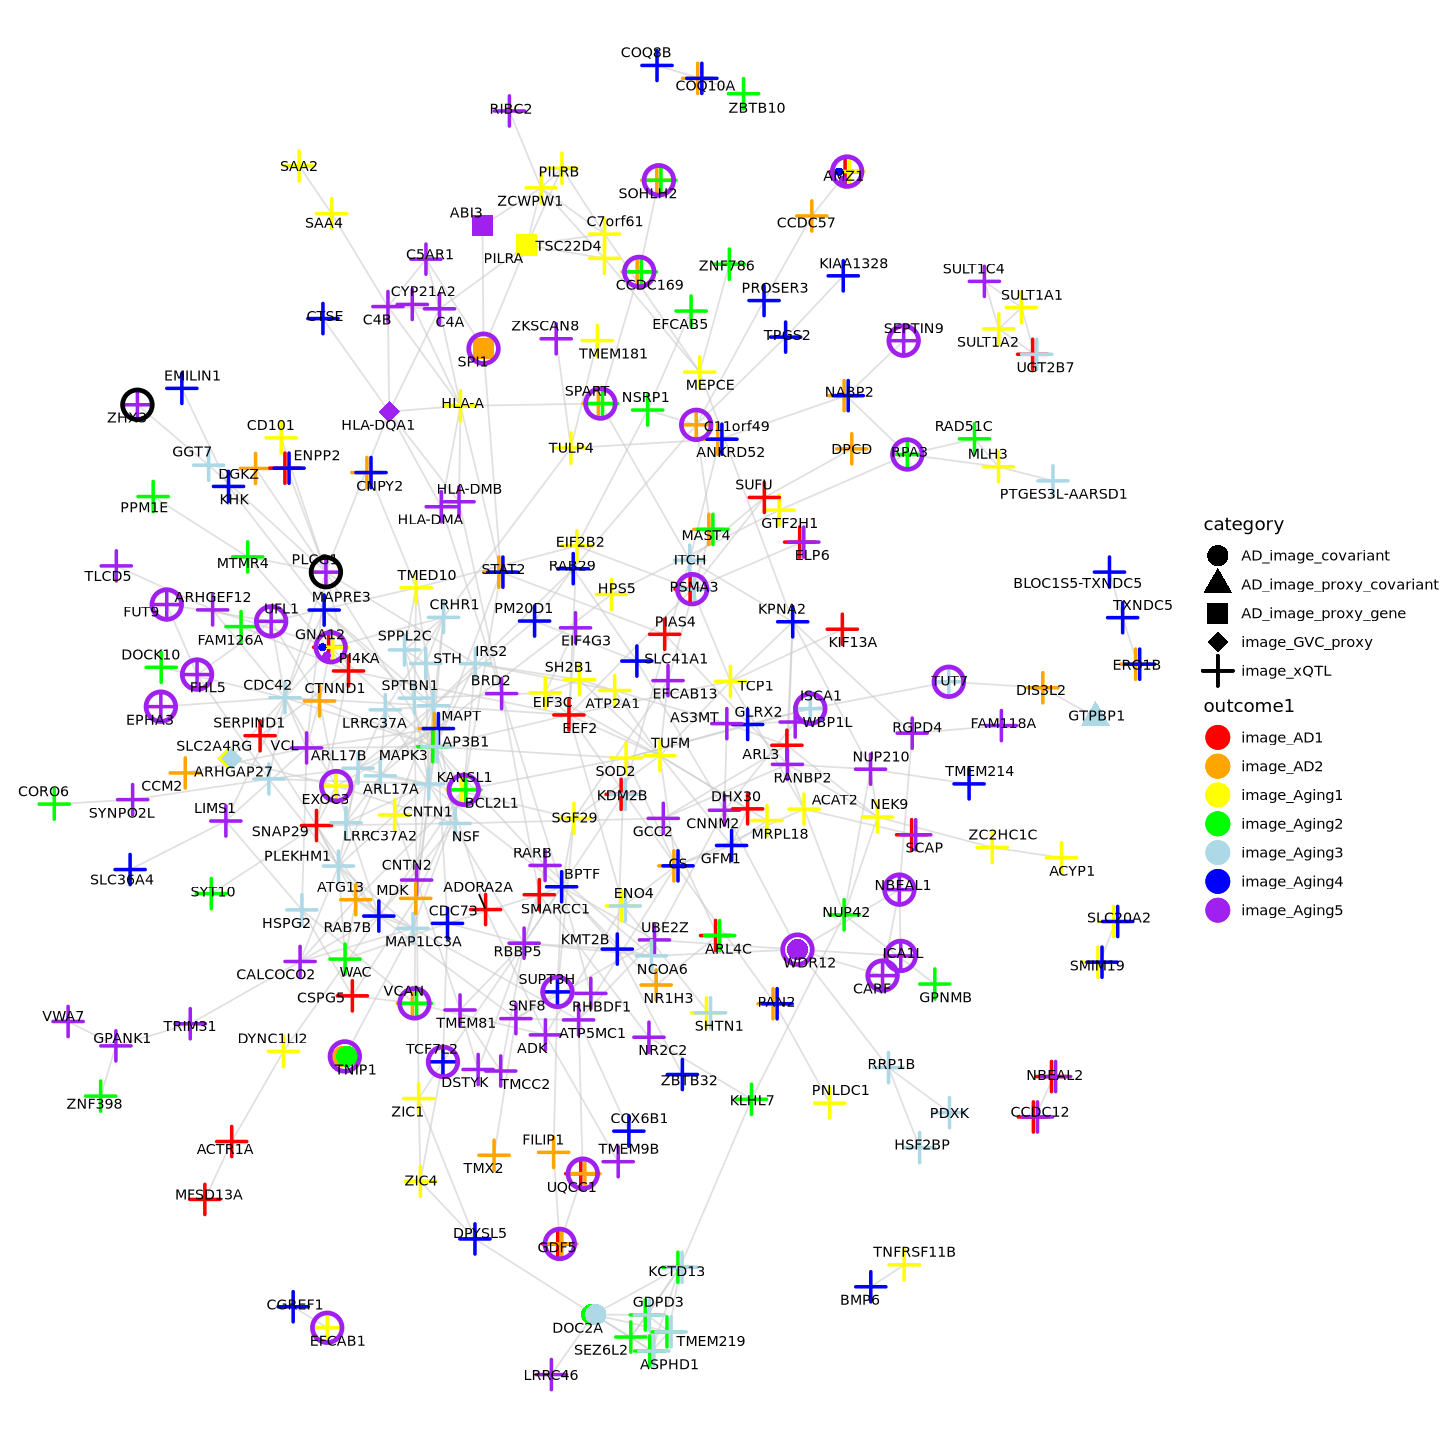

In [193]:
library(tidygraph)
library(ggraph)

# First, create the basic tidygraph object
tg <- as_tbl_graph(g) %>% 
  mutate(category = ifelse(name %in% AD_image_covariant, "AD_image_covariant", 
                          ifelse(name %in% AD_image_proxy_covariant, "AD_image_proxy_covariant", 
                                 ifelse(name %in% AD_image_proxy_gene, "AD_image_proxy_gene", 
                                     ifelse(name %in% image_GVC_proxy, "image_GVC_proxy", "xQTL_only")))))

# Keep all outcome entries for each gene
node_data <- tg %>% 
  activate(nodes) %>% 
  as_tibble() %>%
  left_join(combined_image_sig_xqtl, by = c("name" = "gene_name"))

# Create a summary of resource info for each gene
resource_summary <- node_data %>%
  group_by(name) %>%
  summarise(resource_in_FunGen_xQTL = resource_in_FunGen_xQTL[1], .groups = "drop")

# Update the tidygraph object with resource info
tg <- tg %>%
  activate(nodes) %>%
  left_join(resource_summary, by = "name")

# Prepare outcome data for each gene
outcome_summary <- node_data %>%
  filter(!is.na(outcomes)) %>%
  group_by(name) %>%
  summarise(
    category = category[1],
    outcome1 = outcomes[1],
    outcome2 = if(n() > 1) outcomes[2] else NA_character_,
    total_outcomes = n(),
    .groups = "drop"
  )

# Color mapping
outcome_colors <- c("image_AD1" = "red", "image_AD2" = "orange", 
                   "image_Aging1" = "yellow", "image_Aging2" = "green", 
                   "image_Aging3" = "lightblue", "image_Aging4" = "blue", 
                   "image_Aging5" = "purple")

set.seed(123)
p <- ggraph(tg, layout = "fr") +  
  # Edge layer
  geom_edge_link(color = "grey80", alpha = 0.6)

# Get the layout data for positioning
layout_data <- p$data

# Merge layout data with outcome summary and add category info
plot_data <- layout_data %>%
  left_join(outcome_summary, by = "name") %>%
  mutate(category = ifelse(name %in% AD_image_covariant, "AD_image_covariant", 
                          ifelse(name %in% AD_image_proxy_covariant, "AD_image_proxy_covariant", 
                                 ifelse(name %in% AD_image_proxy_gene, "AD_image_proxy_gene", 
                                     ifelse(name %in% image_GVC_proxy, "image_GVC_proxy", "image_xQTL")))))

# Add nodes for single outcomes
single_outcome_data <- plot_data %>%
  filter(!is.na(outcome1) & is.na(outcome2))

if(nrow(single_outcome_data) > 0) {
  p <- p + 
    geom_node_point(data = single_outcome_data,
                   aes(color = outcome1, shape = category), 
                   size = 5, stroke = 1.5)
}

# Add half-and-half nodes for genes with two outcomes
dual_outcome_data <- plot_data %>%
  filter(!is.na(outcome1) & !is.na(outcome2))

if(nrow(dual_outcome_data) > 0) {
  # Create left half circles
  p <- p + 
    geom_node_point(data = dual_outcome_data,
                   aes(x = x - 0.05, color = outcome1, shape = category), 
                   size = 5, stroke = 1.5) +
    # Create right half circles  
    geom_node_point(data = dual_outcome_data,
                   aes(x = x + 0.05, color = outcome2, shape = category), 
                   size = 5, stroke = 1.5)
}

# Add nodes for genes with no outcomes (grey)
no_outcome_data <- plot_data %>%
  filter(is.na(outcome1))

if(nrow(no_outcome_data) > 0) {
  p <- p + 
    geom_node_point(data = no_outcome_data,
                   aes(shape = category), 
                   color = "grey50", size = 5, stroke = 1.5)
}

# For genes with more than 2 outcomes, add small satellite points
multi_outcome_data <- node_data %>%
  filter(!is.na(outcomes)) %>%
  group_by(name) %>%
  filter(n() > 2) %>%
  mutate(outcome_rank = row_number(),
         total_outcomes = n()) %>%
  ungroup() %>%
  filter(outcome_rank > 2) %>%  # Only outcomes beyond the first two
  left_join(layout_data, by = "name")  # Add x, y coordinates

if(nrow(multi_outcome_data) > 0) {
  p <- p + 
    geom_node_point(data = multi_outcome_data,
                   aes(x = x + 0.2 * cos(2 * pi * outcome_rank / 6),
                       y = y + 0.2 * sin(2 * pi * outcome_rank / 6),
                       color = outcomes),
                   shape = 16, size = 2)
}

p <- p +
  # Additional circle annotations based on resource_in_FunGen_xQTL
  # Purple circles for "ColocBoost,finemapping"
  geom_node_point(data = function(x) filter(x, resource_in_FunGen_xQTL == "ColocBoost,finemapping"),
                  color = "purple", size = 7, shape = 1, stroke = 2) +
  
  # Black circles for "finemapping"
  geom_node_point(data = function(x) filter(x, resource_in_FunGen_xQTL == "finemapping"),
                  color = "black", size = 7, shape = 1, stroke = 2) +
  
  # # Dark blue circles for "ColocBoost"
  # geom_node_point(data = function(x) filter(x, resource_in_FunGen_xQTL == "ColocBoost"),
  #                 color = "darkblue", size = 7, shape = 1, stroke = 2) +
  
  # Node labels
  geom_node_text(aes(label = name), repel = TRUE, size = 3, max.overlaps = 20) +
  
  # Color scale for outcomes
  scale_color_manual(values = outcome_colors, na.value = "grey50") +
  
  # Shape scale for categories
  scale_shape_manual(values = c("AD_image_covariant" = 16,      # filled circle
                               "AD_image_proxy_covariant" = 17,  # filled triangle
                               "AD_image_proxy_gene" = 15,       # filled square
                               "image_GVC_proxy" = 18,           # filled diamond
                               "image_xQTL" = 3),                 # plus sign
                    na.value = 16) +
  
  theme_void() +
  theme(legend.position = "right")

p

In [194]:
ggsave('~/xqtl-analysis/production/image_QTL/analysis/pathway_enrichment_PPI/figs/combined_image_sig_xqtl_PPI.png', width=12, height=12)

### finemap&colocboost genes

In [195]:
# Load necessary libraries
# library(STRINGdb)
# library(dplyr)
# library(igraph)

# Initialize STRINGdb (change species if needed, 9606 = Homo sapiens)
# string_db <- STRINGdb$new(version="11.5", species=9606, score_threshold=400, input_directory="")

# Example gene list (use your own gene symbols or Entrez IDs)
cb_finemap_list = combined_image_sig_xqtl |> filter(resource_in_FunGen_xQTL == "ColocBoost,finemapping")
genes <- cb_finemap_list$gene_name

# Map gene names to STRING IDs
mapped_genes <- string_db$map(data.frame(gene=genes), "gene", removeUnmappedRows = TRUE)
#mapped_genes
# Retrieve interaction network for the genes
ppi_network <- string_db$get_interactions(mapped_genes$STRING_id)


In [196]:
ppi_network_unique <- ppi_network %>%
  mutate(pair = paste0(pmin(from, to), "_", pmax(from, to))) %>%
  distinct(pair, .keep_all = TRUE)

In [197]:
genes_with_ppi <- mapped_genes %>% filter(STRING_id %in% c(ppi_network$from, ppi_network$to))
genes_with_ppi %>% dim 
genes_with_ppi

[1] 19  2

gene    STRING_id           
1  SOHLH2  9606.ENSP00000369210
2  SOHLH2  9606.ENSP00000369210
3  CCDC169 9606.ENSP00000426174
4  CCDC169 9606.ENSP00000426174
5  SPART   9606.ENSP00000414147
6  SPART   9606.ENSP00000414147
7  ICA1L   9606.ENSP00000478645
8  WDR12   9606.ENSP00000261015
9  CARF    9606.ENSP00000384006
10 NBEAL1  9606.ENSP00000399903
11 UQCC1   9606.ENSP00000363506
12 UQCC1   9606.ENSP00000363506
13 GDF5    9606.ENSP00000363492
14 GDF5    9606.ENSP00000363492
15 FUT9    9606.ENSP00000302599
16 UFL1    9606.ENSP00000358283
17 FHL5    9606.ENSP00000326022
18 ISCA1   9606.ENSP00000365159
19 TUT7    9606.ENSP00000365130

In [198]:
symbol_lookup <- dplyr::select(mapped_genes, STRING_id, gene)
symbol_lookup <- dplyr::distinct(symbol_lookup)

In [199]:
options(repr.plot.width = 12, repr.plot.height = 12)
library(igraph)


In [200]:
# Build igraph object
g <- graph_from_data_frame(ppi_network[, c("from", "to")], directed=FALSE)
g <- igraph::simplify(g, remove.multiple = TRUE, remove.loops = TRUE)
# Replace vertex names with gene symbols
V(g)$name <- symbol_lookup$gene[match(V(g)$name, symbol_lookup$STRING_id)]
# Optional: make highlighted genes larger
# V(g)$size <- ifelse(V(g)$name %in% highlight_genes, 8, 4)


In [201]:
AD_image_covariant = c("TNIP1", "WDR12", "DOC2A")
AD_image_proxy_covariant = "GTPBP1"
AD_image_proxy_gene = c("SPI1", "ICA1", "ABI3", "APBB3", "PILRA")
image_GVC_proxy = c("UMAD1", "FOXF1", "SLC2A4RG", "SPDYE3", "HLA-DQA1")


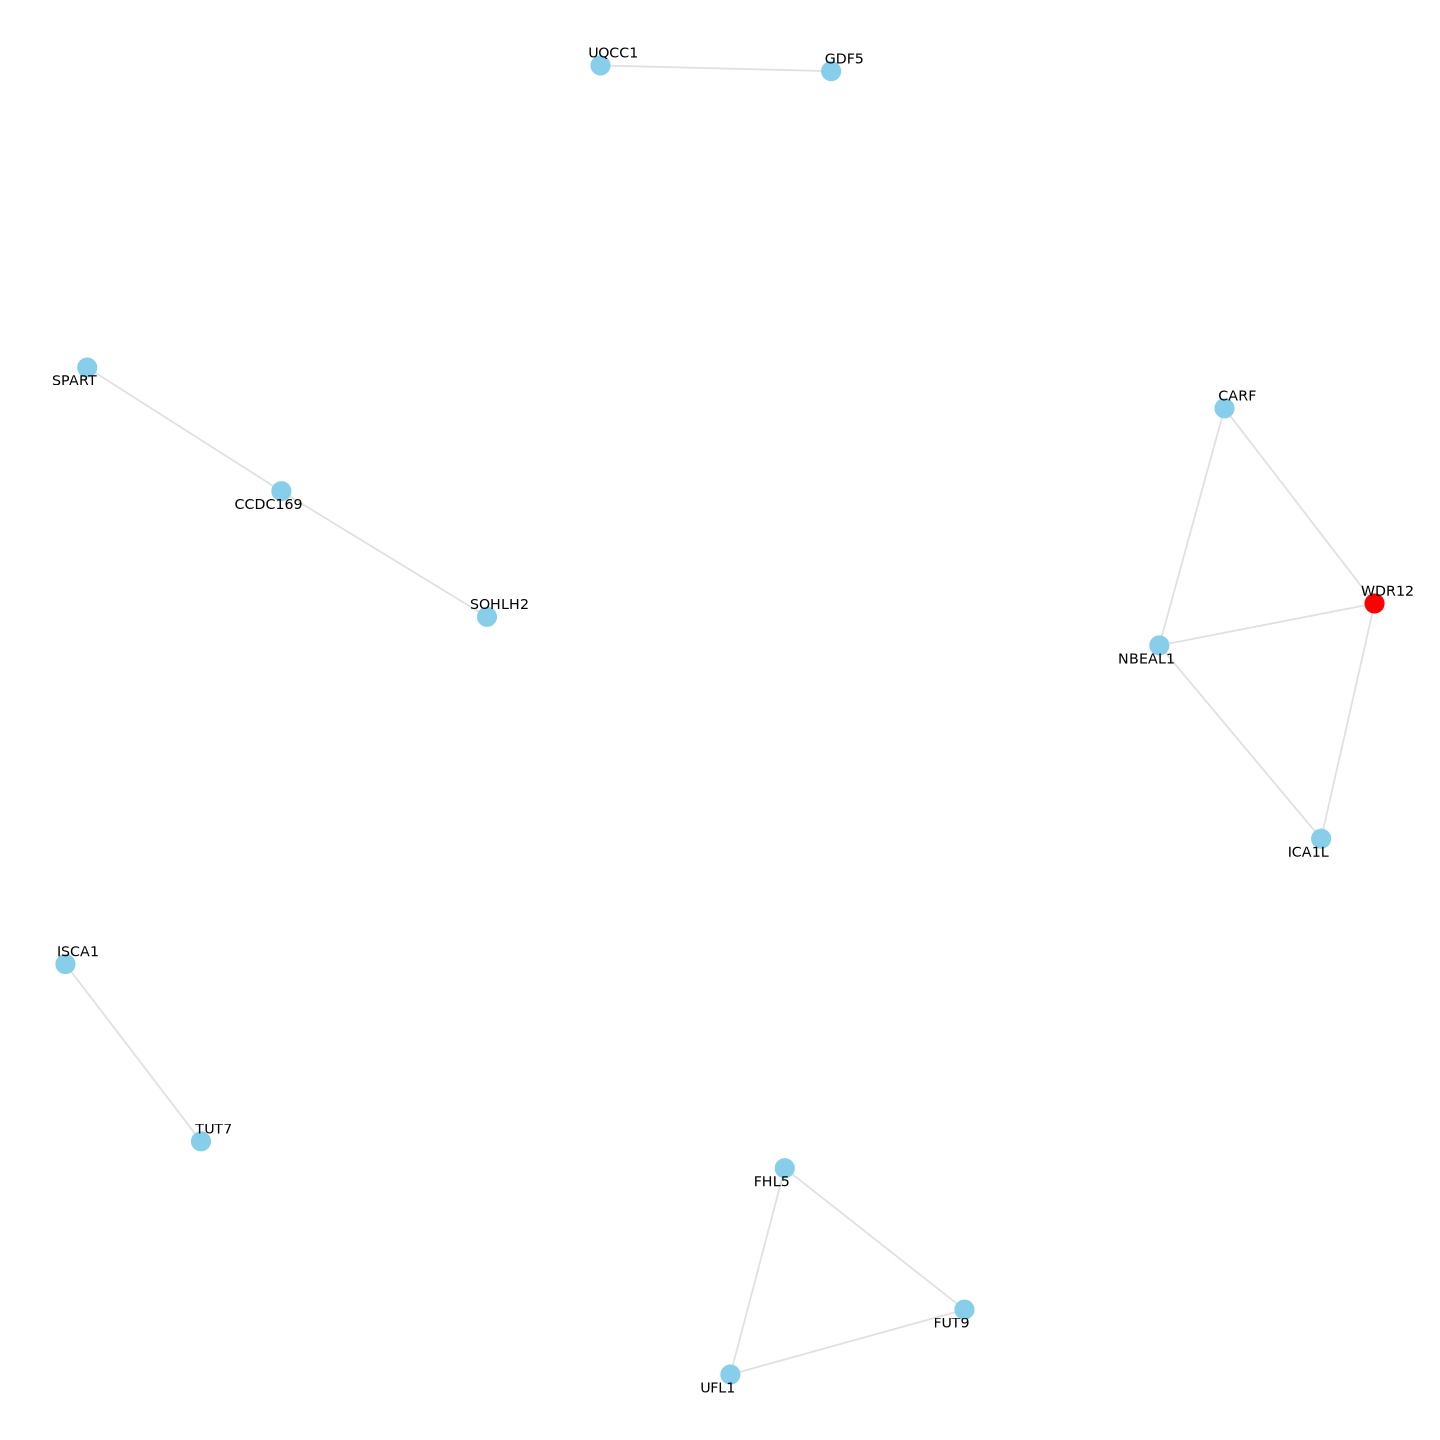

In [202]:
library(tidygraph)
library(ggraph)
tg <- as_tbl_graph(g) %>% 
  mutate(highlight = ifelse(name %in% AD_image_covariant, "AD_image_covariant", # highlight GVC2 genes as 'core genes'
                            ifelse(name %in% AD_image_proxy_covariant, "AD_image_proxy_covariant", # the genes are xQTL only, but more than 1 methods
                                   ifelse(name %in% AD_image_proxy_gene, "AD_image_proxy_gene", # the genes are only from 1 splicing event colocalized results, which are alarming
                                       ifelse(name %in% image_GVC_proxy, "image_GVC_proxy", "xQTL_only"))))) # the genes are xQTL only but only from one methods / shared with GVC or TWAS

set.seed(123)
ggraph(tg, layout = "fr") +  # fr: Fruchterman-Reingold layout
  geom_edge_link(color = "grey80", alpha = 0.6) +
  geom_node_point(aes(color = highlight), size = 5) +
  geom_node_text(aes(label = name), repel = TRUE, size = 3) +
  scale_color_manual(values = c("AD_image_covariant" = "red", "AD_image_proxy_covariant" = "orange", "AD_image_proxy_gene" = "yellow", "image_GVC_proxy" = "green", "xQTL_only" = "skyblue")) +
  theme_void() +
  theme(legend.position = "none")